## 1. Setting & Data Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
import pandas as pd
import numpy as np

In [4]:
import random
np.random.seed(1234)
random.seed(1234)

In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

## 2. Make baseline

In [6]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [9]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [13]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [14]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [15]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [16]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [17]:
import lightgbm as lgb

In [18]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [19]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [20]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.57807e+09
[20]	valid_0's l2: 7.38516e+08
[30]	valid_0's l2: 5.93255e+08
[40]	valid_0's l2: 5.6061e+08
[50]	valid_0's l2: 5.48225e+08
[60]	valid_0's l2: 5.46182e+08
[70]	valid_0's l2: 5.51735e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.45194e+08
0.12719558859476138
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 180923.739979
Training until validation scores don't improve for 20 rounds


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[10]	valid_0's l2: 2.089e+09
[20]	valid_0's l2: 1.22218e+09
[30]	valid_0's l2: 1.03767e+09
[40]	valid_0's l2: 9.7989e+08
[50]	valid_0's l2: 9.47475e+08
[60]	valid_0's l2: 9.27892e+08
[70]	valid_0's l2: 9.20973e+08
[80]	valid_0's l2: 9.1853e+08
[90]	valid_0's l2: 9.0149e+08
[100]	valid_0's l2: 8.97013e+08
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 8.96476e+08
0.14795399816677407
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 75
[LightGBM] [Info] Start training from score 182112.591376
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.80296e+09
[20]	valid_0's l2: 1.02271e+09
[30]	valid_0's l2: 8.68838e+08


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[40]	valid_0's l2: 8.41872e+08
[50]	valid_0's l2: 8.35433e+08
[60]	valid_0's l2: 8.28083e+08
[70]	valid_0's l2: 8.25289e+08
[80]	valid_0's l2: 8.25043e+08
Early stopping, best iteration is:
[66]	valid_0's l2: 8.20654e+08
0.1325997570084599


In [23]:
sum(rmses)/len(rmses)

0.1359164479233318

In [24]:
acutual_pred_df = pd.DataFrame({
                          "actual" : train_Y,
                          "pred" : oof })

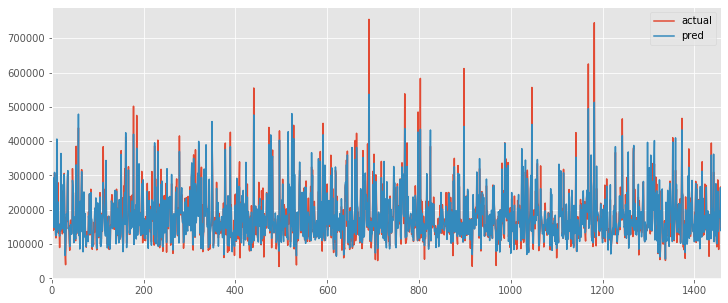

In [25]:
acutual_pred_df.plot(figsize=(12, 5))

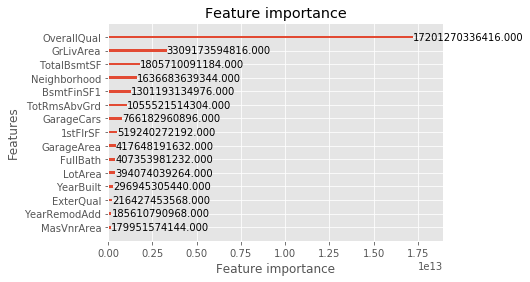

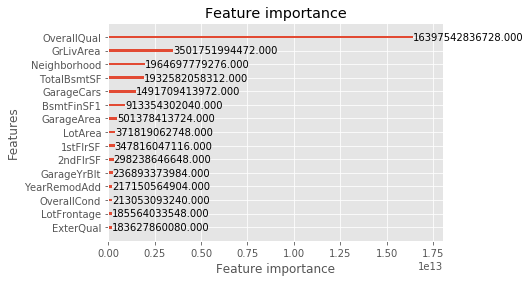

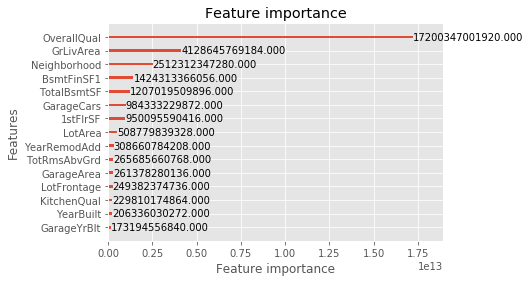

In [26]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

## 3. Preprocessing(object variable)

In [27]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

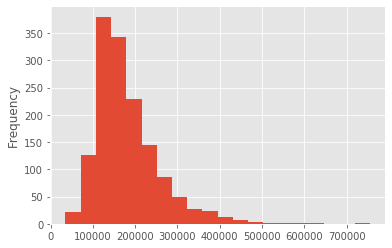

In [28]:
train_df["SalePrice"].plot.hist(bins=20)

In [29]:
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

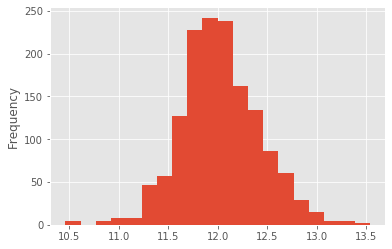

In [30]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [31]:
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [33]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707

C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[20]	valid_0's l2: 0.0219638
[30]	valid_0's l2: 0.0178863
[40]	valid_0's l2: 0.0168272
[50]	valid_0's l2: 0.0165421
[60]	valid_0's l2: 0.0164067
[70]	valid_0's l2: 0.0163235
[80]	valid_0's l2: 0.0162611
[90]	valid_0's l2: 0.0162673
[100]	valid_0's l2: 0.0163207
Did not meet early stopping. Best iteration is:
[81]	valid_0's l2: 0.0162538
0.12749050377720023
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.025976
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0494901

C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[20]	valid_0's l2: 0.028109
[30]	valid_0's l2: 0.0235203
[40]	valid_0's l2: 0.0218816
[50]	valid_0's l2: 0.0212745
[60]	valid_0's l2: 0.0209102
[70]	valid_0's l2: 0.0207806
[80]	valid_0's l2: 0.0206708
[90]	valid_0's l2: 0.020634
[100]	valid_0's l2: 0.0206411
Did not meet early stopping. Best iteration is:
[89]	valid_0's l2: 0.0206181
0.1435901195442448
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 75
[LightGBM] [Info] Start training from score 12.028565
Training until validation scores don't improve for 20 rounds


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[10]	valid_0's l2: 0.0390113
[20]	valid_0's l2: 0.0212181
[30]	valid_0's l2: 0.0176641
[40]	valid_0's l2: 0.0167935
[50]	valid_0's l2: 0.016452
[60]	valid_0's l2: 0.0162947
[70]	valid_0's l2: 0.0161933
[80]	valid_0's l2: 0.0162265
[90]	valid_0's l2: 0.0162094
Early stopping, best iteration is:
[72]	valid_0's l2: 0.0161708
0.1271643059371225


In [34]:
sum(rmses)/len(rmses)

0.13274830975285581

## 4. Preproccesing(Explanatory variable)

In [35]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [36]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [37]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
RoofMatl           0
MSSubClass         0
LotArea            0
OverallCond        0
dtype: int64

In [38]:
all_df.PoolQC.value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [39]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [40]:
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [41]:
HighFacility_col = ["PoolQC", "MiscFeature", "Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object":
        if len(all_df[all_df[col].isnull()]) > 0:
            all_df.loc[~all_df[col].isnull(), col] = 1
            all_df.loc[all_df[col].isnull(), col] = 0

In [42]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [43]:
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [44]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [45]:
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

## 5. Outlier

In [46]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [47]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [48]:
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

In [49]:
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))

In [50]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [51]:
train_df_num_rs = train_df_num[num_features]

In [52]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [53]:
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) | (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


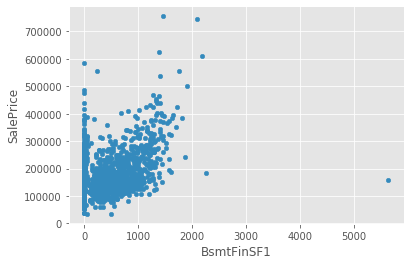

In [54]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [55]:
all_df[all_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


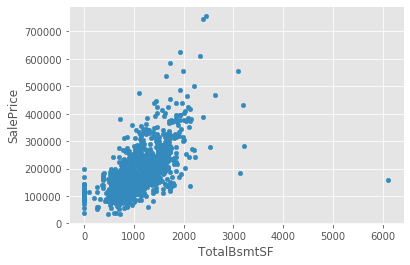

In [56]:
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [57]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


In [58]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 100000) | (all_df["SalePrice"].isnull())]

In [59]:
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [60]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [61]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423077

C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[20]	valid_0's l2: 0.0220026
[30]	valid_0's l2: 0.0175682
[40]	valid_0's l2: 0.0163798
[50]	valid_0's l2: 0.0162547
[60]	valid_0's l2: 0.0162622
[70]	valid_0's l2: 0.0162514
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161791
0.12719701309461987
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2943
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0467163
[20]	valid_0's l2: 0.026693
[30]	valid_0's l2: 0.0218687
[40]	valid_0's l2: 0.0201122
[50]	valid_0's l2: 0.0196764
[60]	valid_0's l2: 0.0196786
[70]	valid_0's l2: 0.0196393
[80]	valid_0's l2: 0.0195357
[90]	valid_0's l2: 0.0194547
[100]	valid_0's l2: 0.0193847
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0193847
0.13922901661972728
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2987
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 73
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[10]	valid_0's l2: 0.0370497
[20]	valid_0's l2: 0.0195352
[30]	valid_0's l2: 0.016412
[40]	valid_0's l2: 0.0155942
[50]	valid_0's l2: 0.0151884
[60]	valid_0's l2: 0.0151752
[70]	valid_0's l2: 0.0153067
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0151274
0.12299343081439215


In [63]:
sum(rmses)/len(rmses)

0.1298064868429131

## 6. Feature Engineering

In [64]:
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [65]:
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [66]:
train_df_le = all_df[~all_df["SalePrice"].isnull()] 
test_df_le = all_df[all_df["SalePrice"].isnull()] 

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3046
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[10]	valid_0's l2: 0.042401
[20]	valid_0's l2: 0.0217498
[30]	valid_0's l2: 0.0175187
[40]	valid_0's l2: 0.0162941
[50]	valid_0's l2: 0.0160985
[60]	valid_0's l2: 0.0160802
[70]	valid_0's l2: 0.0161142
[80]	valid_0's l2: 0.016149
Early stopping, best iteration is:
[68]	valid_0's l2: 0.0160466
0.1266752634099996
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3037
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0474127


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[20]	valid_0's l2: 0.0267678
[30]	valid_0's l2: 0.0217538
[40]	valid_0's l2: 0.0202289
[50]	valid_0's l2: 0.0195781
[60]	valid_0's l2: 0.0193996
[70]	valid_0's l2: 0.0192883
[80]	valid_0's l2: 0.0191879
[90]	valid_0's l2: 0.0190851
[100]	valid_0's l2: 0.0190718
Did not meet early stopping. Best iteration is:
[92]	valid_0's l2: 0.0190473
0.13801208062538026
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3083
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 74
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.036582


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[20]	valid_0's l2: 0.0194084
[30]	valid_0's l2: 0.0166797
[40]	valid_0's l2: 0.0156895
[50]	valid_0's l2: 0.0154457
[60]	valid_0's l2: 0.0154421
[70]	valid_0's l2: 0.0152662
[80]	valid_0's l2: 0.0152912
Early stopping, best iteration is:
[69]	valid_0's l2: 0.0152521
0.12349954721537992


In [68]:
sum(rmses)/len(rmses)

0.12939563041691993

In [69]:
all_df[["LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea","WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LotFrontage"]].describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [70]:
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]

In [71]:
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]

In [72]:
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF", axis=1)

In [73]:
train_df_le = all_df[~all_df["SalePrice"].isnull()] 
test_df_le = all_df[all_df["SalePrice"].isnull()] 

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 76
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[10]	valid_0's l2: 0.0382198
[20]	valid_0's l2: 0.0195098
[30]	valid_0's l2: 0.0163133
[40]	valid_0's l2: 0.0155157
[50]	valid_0's l2: 0.0154576
[60]	valid_0's l2: 0.0155145
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0154265
0.12420330159076388
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3300
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 76
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0453783

C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[20]	valid_0's l2: 0.025826
[30]	valid_0's l2: 0.0215187
[40]	valid_0's l2: 0.0201657
[50]	valid_0's l2: 0.0198966
[60]	valid_0's l2: 0.0197534
[70]	valid_0's l2: 0.0196558
[80]	valid_0's l2: 0.0195791
[90]	valid_0's l2: 0.01961
[100]	valid_0's l2: 0.0195983
Early stopping, best iteration is:
[80]	valid_0's l2: 0.0195791
0.13992537633195495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 77
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0351087
[20]	valid_0's l2: 0.0182816
[30]	valid_0's l2: 0.0151312


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[40]	valid_0's l2: 0.0142171
[50]	valid_0's l2: 0.0139836
[60]	valid_0's l2: 0.0138187
[70]	valid_0's l2: 0.0138913
[80]	valid_0's l2: 0.013994
Early stopping, best iteration is:
[66]	valid_0's l2: 0.0137713
0.11735107013879016


In [75]:
sum(rmses)/len(rmses)

0.127159916020503

## 7. Hyper Parameter Optimization

In [76]:
import optuna

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [79]:
def objective(trial):
    params = {
        "objective":"regression",
        "random_seed":1234,
        "learning_rate":0.05,
        "n_estimators":1000,
        
        "num_leaves":trial.suggest_int("num_leaves", 4, 64),
        "max_bin":trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction":trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
        "bagging_freq":trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction":trial.suggest_uniform("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return score

In [80]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2021-06-05 17:18:34,879] A new study created in memory with name: no-name-a1298398-3d9d-4060-902c-11e210d0715b
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659468
[20]	valid_0's l2: 0.0360287
[30]	valid_0's l2: 0.0239196
[40]	valid_0's l2: 0.0183967
[50]	valid_0's l2: 0.0161611
[60]	valid_0's l2: 0.015461
[70]	valid_0's l2: 0.0148438
[80]	valid_0's l2: 0.0145826
[90]	valid_0's l2: 0.0144628
[100]	valid_0's l2: 0.0143176
[110]	valid_0's l2: 0.0142316
[120]	valid_0's l2: 0.0142159
[130]	valid_0's l2: 0.0142722
Early stopping, best iteration is:
[119]	valid_0's l2: 0.0142133


[I 2021-06-05 17:18:36,347] Trial 0 finished with value: 0.11921948775949834 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feature_fraction': 0.6118273996694523, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11921948775949834.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3097
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.064469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2021-06-05 17:18:38,627] Trial 1 finished with value: 0.12012901418633552 and parameters: {'num_leaves': 58, 'max_bin': 195, 'bagging_fraction': 0.5917207594128888, 'bagging_freq': 8, 'feature_fraction': 0.6644474598764523, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723969
[20]	valid_0's l2: 0.0430363
[30]	valid_0's l2: 0.0303053
[40]	valid_0's l2: 0.0239242
[50]	valid_0's l2: 0.0202706
[60]	valid_0's l2: 0.0183297
[70]	valid_0's l2: 0.0171541
[80]	valid_0's l2: 0.0162883
[90]	valid_0's l2: 0.0158127
[100]	valid_0's l2: 0.0154521
[110]	valid_0's l2: 0.0149976
[120]	valid_0's l2: 0.0150278
[130]	valid_0's l2: 0.0150877
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0149902


[I 2021-06-05 17:18:39,350] Trial 2 finished with value: 0.12243462195761393 and parameters: {'num_leaves': 8, 'max_bin': 63, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 9, 'feature_fraction': 0.7890783754749253, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0641327
[20]	valid_0's l2: 0.034555
[30]	valid_0's l2: 0.0232564
[40]	valid_0's l2: 0.0185056
[50]	valid_0's l2: 0.0165158
[60]	valid_0's l2: 0.0155843
[70]	valid_0's l2: 0.0151748
[80]	valid_0's l2: 0.014894
[90]	valid_0's l2: 0.0148207
[100]	valid_0's l2: 0.0146971
[110]	valid_0's l2: 0.0146044
[120]	valid_0's l2: 0.0145469
[130]	valid_0's l2: 0.0144888
[140]	valid_0's l2: 0.0143614
[150]	valid_0's l2: 0.014341
[160]	valid_0's l2: 0.0143097
[170]	valid_0's l2: 0.0143001
Early stopping, best iteration is:
[157]	valid_0's l2: 0.0142773


[I 2021-06-05 17:18:40,853] Trial 3 finished with value: 0.11948763685441077 and parameters: {'num_leaves': 52, 'max_bin': 119, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921948775949834.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066408
[20]	valid_0's l2: 0.0363539
[30]	valid_0's l2: 0.0242351
[40]	valid_0's l2: 0.0189323
[50]	valid_0's l2: 0.0162179
[60]	valid_0's l2: 0.0147991
[70]	valid_0's l2: 0.0143232
[80]	valid_0's l2: 0.0143152
[90]	valid_0's l2: 0.0142693
[100]	valid_0's l2: 0.0140259
[110]	valid_0's l2: 0.0140546
[120]	valid_0's l2: 0.0138189
[130]	valid_0's l2: 0.0137193
[140]	valid_0's l2: 0.0137243
[150]	valid_0's l2: 0.0135936
[160]	valid_0's l2: 0.0135242
[170]	valid_0's l2: 0.0135713
[180]	valid_0's l2: 0.0136351
Early stopping, best iteration is:
[161]	valid_0's l2: 0.0135055


[I 2021-06-05 17:18:42,010] Trial 4 finished with value: 0.11621335807143585 and parameters: {'num_leaves': 35, 'max_bin': 112, 'bagging_fraction': 0.5322778060523135, 'bagging_freq': 8, 'feature_fraction': 0.6280751661082743, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0639992
[20]	valid_0's l2: 0.0357102
[30]	valid_0's l2: 0.0236082
[40]	valid_0's l2: 0.0186928
[50]	valid_0's l2: 0.016742
[60]	valid_0's l2: 0.0157799
[70]	valid_0's l2: 0.0155055
[80]	valid_0's l2: 0.0152684
[90]	valid_0's l2: 0.0151588
[100]	valid_0's l2: 0.0151961
[110]	valid_0's l2: 0.0152685
Early stopping, best iteration is:
[94]	valid_0's l2: 0.0151008


[I 2021-06-05 17:18:43,070] Trial 5 finished with value: 0.12288551018586134 and parameters: {'num_leaves': 41, 'max_bin': 142, 'bagging_fraction': 0.7084669984373785, 'bagging_freq': 10, 'feature_fraction': 0.7409101495517417, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1500
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0650692
[20]	valid_0's l2: 0.035213
[30]	valid_0's l2: 0.0235695
[40]	valid_0's l2: 0.0189368
[50]	valid_0's l2: 0.0171787
[60]	valid_0's l2: 0.0162984
[70]	valid_0's l2: 0.0160839
[80]	valid_0's l2: 0.0159674
[90]	valid_0's l2: 0.0157391
[100]	valid_0's l2: 0.0156661
[110]	valid_0's l2: 0.015579
[120]	valid_0's l2: 0.0154832
[130]	valid_0's l2: 0.0153392
[140]	valid_0's l2: 0.0153525
[150]	valid_0's l2: 0.0153259
[160]	valid_0's l2: 0.0153393
[170]	valid_0's l2: 0.015381
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0153074


[I 2021-06-05 17:18:44,507] Trial 6 finished with value: 0.12372288602804948 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2554
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0685588
[20]	valid_0's l2: 0.0385705
[30]	valid_0's l2: 0.0262354
[40]	valid_0's l2: 0.0206248
[50]	valid_0's l2: 0.017847
[60]	valid_0's l2: 0.0167885
[70]	valid_0's l2: 0.0160365
[80]	valid_0's l2: 0.0157248
[90]	valid_0's l2: 0.0156422
[100]	valid_0's l2: 0.0155114
[110]	valid_0's l2: 0.0154175
[120]	valid_0's l2: 0.015317
[130]	valid_0's l2: 0.0151995
[140]	valid_0's l2: 0.0152626
[150]	valid_0's l2: 0.0152446
Early stopping, best iteration is:
[134]	valid_0's l2: 0.0151922


[I 2021-06-05 17:18:45,551] Trial 7 finished with value: 0.12325661836479342 and parameters: {'num_leaves': 26, 'max_bin': 136, 'bagging_fraction': 0.6193007567311601, 'bagging_freq': 10, 'feature_fraction': 0.45102240537401406, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653917
[20]	valid_0's l2: 0.0353138
[30]	valid_0's l2: 0.0236292
[40]	valid_0's l2: 0.0191997
[50]	valid_0's l2: 0.0170269
[60]	valid_0's l2: 0.0159562
[70]	valid_0's l2: 0.015702
[80]	valid_0's l2: 0.0155463
[90]	valid_0's l2: 0.0154414
[100]	valid_0's l2: 0.0153966
[110]	valid_0's l2: 0.0153345
[120]	valid_0's l2: 0.0152618
[130]	valid_0's l2: 0.015293
[140]	valid_0's l2: 0.0152435
[150]	valid_0's l2: 0.0152064
[160]	valid_0's l2: 0.0151995
[170]	valid_0's l2: 0.0152254
Early stopping, best iteration is:
[159]	valid_0's l2: 0.0151783


[I 2021-06-05 17:18:46,950] Trial 8 finished with value: 0.123200368396042 and parameters: {'num_leaves': 43, 'max_bin': 88, 'bagging_fraction': 0.6331553864281532, 'bagging_freq': 3, 'feature_fraction': 0.4794847918227599, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0720131
[20]	valid_0's l2: 0.0421651
[30]	valid_0's l2: 0.0286681
[40]	valid_0's l2: 0.0219793
[50]	valid_0's l2: 0.0183408
[60]	valid_0's l2: 0.0164611
[70]	valid_0's l2: 0.01556
[80]	valid_0's l2: 0.015073
[90]	valid_0's l2: 0.0147495
[100]	valid_0's l2: 0.0145849
[110]	valid_0's l2: 0.0144036
[120]	valid_0's l2: 0.014341
[130]	valid_0's l2: 0.0143924
[140]	valid_0's l2: 0.0141699
[150]	valid_0's l2: 0.014075
[160]	valid_0's l2: 0.0140664
[170]	valid_0's l2: 0.0140677
[180]	valid_0's l2: 0.0140645
Early stopping, best iteration is:
[164]	valid_0's l2: 0.0140042


[I 2021-06-05 17:18:47,879] Trial 9 finished with value: 0.11833930321635734 and parameters: {'num_leaves': 12, 'max_bin': 79, 'bagging_fraction': 0.5843625853304821, 'bagging_freq': 9, 'feature_fraction': 0.44855063789653066, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2368
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0645947
[20]	valid_0's l2: 0.0349
[30]	valid_0's l2: 0.0239167
[40]	valid_0's l2: 0.019325
[50]	valid_0's l2: 0.017922
[60]	valid_0's l2: 0.017351
[70]	valid_0's l2: 0.0171303
[80]	valid_0's l2: 0.0171538
[90]	valid_0's l2: 0.0170625
[100]	valid_0's l2: 0.0169556
[110]	valid_0's l2: 0.0169456
[120]	valid_0's l2: 0.0168885
[130]	valid_0's l2: 0.0168479
[140]	valid_0's l2: 0.0168025
[150]	valid_0's l2: 0.0167815
[160]	valid_0's l2: 0.0168289
[170]	valid_0's l2: 0.0168183
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0167815


[I 2021-06-05 17:18:49,807] Trial 10 finished with value: 0.1295435415929816 and parameters: {'num_leaves': 63, 'max_bin': 120, 'bagging_fraction': 0.8883805440951686, 'bagging_freq': 7, 'feature_fraction': 0.7696317896991509, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723296
[20]	valid_0's l2: 0.0424445
[30]	valid_0's l2: 0.0284022
[40]	valid_0's l2: 0.0222346
[50]	valid_0's l2: 0.0189382
[60]	valid_0's l2: 0.0171733
[70]	valid_0's l2: 0.0163607
[80]	valid_0's l2: 0.0154663
[90]	valid_0's l2: 0.0151567
[100]	valid_0's l2: 0.0149257
[110]	valid_0's l2: 0.0147376
[120]	valid_0's l2: 0.0145206
[130]	valid_0's l2: 0.0145659
[140]	valid_0's l2: 0.0145321
[150]	valid_0's l2: 0.0144151
[160]	valid_0's l2: 0.0143894
[170]	valid_0's l2: 0.0144635
[180]	valid_0's l2: 0.0146086
Early stopping, best iteration is:
[163]	valid_0's l2: 0.0143601


[I 2021-06-05 17:18:50,676] Trial 11 finished with value: 0.11983377452964886 and parameters: {'num_leaves': 11, 'max_bin': 94, 'bagging_fraction': 0.45936385947712205, 'bagging_freq': 4, 'feature_fraction': 0.607131497257335, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0652096
[20]	valid_0's l2: 0.0355787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0236788
[40]	valid_0's l2: 0.0185916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l2: 0.0165607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0154825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l2: 0.0149025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	va

[I 2021-06-05 17:18:51,610] Trial 12 finished with value: 0.12066129587078789 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feature_fraction': 0.6879732477780897, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0675109
[20]	valid_0's l2: 0.0373061
[30]	valid_0's l2: 0.0244711
[40]	valid_0's l2: 0.0192189
[50]	valid_0's l2: 0.0169365
[60]	valid_0's l2: 0.015945
[70]	valid_0's l2: 0.0153745
[80]	valid_0's l2: 0.0150851
[90]	valid_0's l2: 0.014887
[100]	valid_0's l2: 0.0147742
[110]	valid_0's l2: 0.0146256
[120]	valid_0's l2: 0.0146666
[130]	valid_0's l2: 0.0145984
[140]	valid_0's l2: 0.014508
[150]	valid_0's l2: 0.0144821
[160]	valid_0's l2: 0.0144311
[170]	valid_0's l2: 0.014398
[180]	valid_0's l2: 0.0144176
[190]	valid_0's l2: 0.0144799
Early stopping, best iteration is:
[171]	valid_0's l2: 0.0143881


[I 2021-06-05 17:18:53,097] Trial 13 finished with value: 0.1199504383453797 and parameters: {'num_leaves': 44, 'max_bin': 69, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0661537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0140446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2021-06-05 17:18:54,760] Trial 14 finished with value: 0.1183866598579404 and parameters: {'num_leaves': 54, 'max_bin': 50, 'bagging_fraction': 0.7389082683981151, 'bagging_freq': 3, 'feature_fraction': 0.7675970110612975, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652192
[20]	valid_0's l2: 0.0356203
[30]	valid_0's l2: 0.023876
[40]	valid_0's l2: 0.0188538
[50]	valid_0's l2: 0.0170089
[60]	valid_0's l2: 0.0161279
[70]	valid_0's l2: 0.0157713
[80]	valid_0's l2: 0.0154205
[90]	valid_0's l2: 0.0153315
[100]	valid_0's l2: 0.0151689
[110]	valid_0's l2: 0.0150059
[120]	valid_0's l2: 0.0150484
[130]	valid_0's l2: 0.0150938
Early stopping, best iteration is:
[110]	valid_0's l2: 0.0150059


[I 2021-06-05 17:18:55,873] Trial 15 finished with value: 0.12249843914982214 and parameters: {'num_leaves': 39, 'max_bin': 139, 'bagging_fraction': 0.6861259528954367, 'bagging_freq': 3, 'feature_fraction': 0.8763745057584925, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0654476
[20]	valid_0's l2: 0.0348945
[30]	valid_0's l2: 0.0232133
[40]	valid_0's l2: 0.0186158
[50]	valid_0's l2: 0.0167928
[60]	valid_0's l2: 0.0158671
[70]	valid_0's l2: 0.0151884
[80]	valid_0's l2: 0.014973
[90]	valid_0's l2: 0.0148574
[100]	valid_0's l2: 0.0147908
[110]	valid_0's l2: 0.0147467
[120]	valid_0's l2: 0.0147442
[130]	valid_0's l2: 0.0147911
[140]	valid_0's l2: 0.0146097
[150]	valid_0's l2: 0.0146298
[160]	valid_0's l2: 0.0146584
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0145922


[I 2021-06-05 17:18:57,147] Trial 16 finished with value: 0.12079833209560319 and parameters: {'num_leaves': 46, 'max_bin': 94, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0635115
[20]	valid_0's l2: 0.0356727
[30]	valid_0's l2: 0.0241828
[40]	valid_0's l2: 0.0197761
[50]	valid_0's l2: 0.017458
[60]	valid_0's l2: 0.0164014
[70]	valid_0's l2: 0.0161523
[80]	valid_0's l2: 0.015674
[90]	valid_0's l2: 0.0155865
[100]	valid_0's l2: 0.0156389
Early stopping, best iteration is:
[85]	valid_0's l2: 0.0155394


[I 2021-06-05 17:18:58,159] Trial 17 finished with value: 0.12465732708852482 and parameters: {'num_leaves': 46, 'max_bin': 159, 'bagging_fraction': 0.6506621909633512, 'bagging_freq': 10, 'feature_fraction': 0.7219950996148188, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0772015
[20]	valid_0's l2: 0.0488641
[30]	valid_0's l2: 0.034581
[40]	valid_0's l2: 0.0270809
[50]	valid_0's l2: 0.0230393
[60]	valid_0's l2: 0.020913
[70]	valid_0's l2: 0.0198276
[80]	valid_0's l2: 0.018913
[90]	valid_0's l2: 0.0180636
[100]	valid_0's l2: 0.0173222
[110]	valid_0's l2: 0.0167365
[120]	valid_0's l2: 0.0162763
[130]	valid_0's l2: 0.016011
[140]	valid_0's l2: 0.0157394
[150]	valid_0's l2: 0.0154868
[160]	valid_0's l2: 0.0154228
[170]	valid_0's l2: 0.0153516
[180]	valid_0's l2: 0.0152941
[190]	valid_0's l2: 0.0150688
[200]	valid_0's l2: 0.0149567
[210]	valid_0's l2: 0.0148402
[220]	valid_0's l2: 0.0148004
[230]	valid_0's l2: 0.0146198
[240]	valid_0's l2: 0.0145606
[250]	valid_0's l2: 0.0145366
[260]	valid_0's l2: 0.0144597
[270]	valid_0's l2: 0.0144057
[280]	valid_0's l2: 0.014351
[290]	valid_0's l2: 0.0143398
[300]	valid_0's l2: 0.0143803

[I 2021-06-05 17:18:59,144] Trial 18 finished with value: 0.11966528057480719 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feature_fraction': 0.7090077144994208, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2554
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666045
[20]	valid_0's l2: 0.037398
[30]	valid_0's l2: 0.0252309
[40]	valid_0's l2: 0.0194101
[50]	valid_0's l2: 0.016904
[60]	valid_0's l2: 0.0160305
[70]	valid_0's l2: 0.0153439
[80]	valid_0's l2: 0.0148304
[90]	valid_0's l2: 0.0147109
[100]	valid_0's l2: 0.0145076
[110]	valid_0's l2: 0.0145036
[120]	valid_0's l2: 0.0144584
[130]	valid_0's l2: 0.0144166
[140]	valid_0's l2: 0.0145413
[150]	valid_0's l2: 0.0145218
Early stopping, best iteration is:
[131]	valid_0's l2: 0.014407


[I 2021-06-05 17:19:00,166] Trial 19 finished with value: 0.12002938223871082 and parameters: {'num_leaves': 22, 'max_bin': 136, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.06419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0154998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[92]	valid_0's l2: 0.0154819


[I 2021-06-05 17:19:01,627] Trial 20 finished with value: 0.12442620993318665 and parameters: {'num_leaves': 58, 'max_bin': 105, 'bagging_fraction': 0.6179324626328134, 'bagging_freq': 9, 'feature_fraction': 0.8030969945230428, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0646566
[20]	valid_0's l2: 0.0348004
[30]	valid_0's l2: 0.023748
[40]	valid_0's l2: 0.0194866
[50]	valid_0's l2: 0.0176701
[60]	valid_0's l2: 0.0170057
[70]	valid_0's l2: 0.0167843
[80]	valid_0's l2: 0.016537
[90]	valid_0's l2: 0.0164991
[100]	valid_0's l2: 0.0163692
[110]	valid_0's l2: 0.0162118
[120]	valid_0's l2: 0.0162129
[130]	valid_0's l2: 0.0162495
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0161767


[I 2021-06-05 17:19:03,263] Trial 21 finished with value: 0.12718774119423695 and parameters: {'num_leaves': 60, 'max_bin': 157, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0717053
[20]	valid_0's l2: 0.0413166
[30]	valid_0's l2: 0.0279717
[40]	valid_0's l2: 0.0219095
[50]	valid_0's l2: 0.0189611
[60]	valid_0's l2: 0.0172604
[70]	valid_0's l2: 0.0164715
[80]	valid_0's l2: 0.0160482
[90]	valid_0's l2: 0.0157468
[100]	valid_0's l2: 0.0153786
[110]	valid_0's l2: 0.0151728
[120]	valid_0's l2: 0.0149921
[130]	valid_0's l2: 0.0149268
[140]	valid_0's l2: 0.0148403
[150]	valid_0's l2: 0.0148404
Early stopping, best iteration is:
[137]	valid_0's l2: 0.0147653


[I 2021-06-05 17:19:04,082] Trial 22 finished with value: 0.12151261222488925 and parameters: {'num_leaves': 11, 'max_bin': 178, 'bagging_fraction': 0.8036594793625054, 'bagging_freq': 6, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2831
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0656779
[20]	valid_0's l2: 0.0362675
[30]	valid_0's l2: 0.0243702
[40]	valid_0's l2: 0.019556
[50]	valid_0's l2: 0.0175464
[60]	valid_0's l2: 0.0166221
[70]	valid_0's l2: 0.016172
[80]	valid_0's l2: 0.0160095
[90]	valid_0's l2: 0.015721
[100]	valid_0's l2: 0.0155644
[110]	valid_0's l2: 0.0154965
[120]	valid_0's l2: 0.0154206
[130]	valid_0's l2: 0.0153846
[140]	valid_0's l2: 0.0154011
[150]	valid_0's l2: 0.0152218
[160]	valid_0's l2: 0.0151882
[170]	valid_0's l2: 0.0151679
[180]	valid_0's l2: 0.0151587
[190]	valid_0's l2: 0.0151501
[200]	valid_0's l2: 0.0151077
[210]	valid_0's l2: 0.0151401
[220]	valid_0's l2: 0.0151285
[230]	valid_0's l2: 0.015138
Early stopping, best iteration is:
[214]	valid_0's l2: 0.0150949


[I 2021-06-05 17:19:05,698] Trial 23 finished with value: 0.12286137283920079 and parameters: {'num_leaves': 31, 'max_bin': 159, 'bagging_fraction': 0.8331911629643146, 'bagging_freq': 10, 'feature_fraction': 0.8279016711963055, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666495
[20]	valid_0's l2: 0.0366255
[30]	valid_0's l2: 0.0251371
[40]	valid_0's l2: 0.0201572
[50]	valid_0's l2: 0.0179482
[60]	valid_0's l2: 0.0167342
[70]	valid_0's l2: 0.0163499
[80]	valid_0's l2: 0.0159761
[90]	valid_0's l2: 0.0157986
[100]	valid_0's l2: 0.0158269
[110]	valid_0's l2: 0.015862
Early stopping, best iteration is:
[91]	valid_0's l2: 0.0157823


[I 2021-06-05 17:19:06,760] Trial 24 finished with value: 0.12562753706931873 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0688781
[20]	valid_0's l2: 0.0382244
[30]	valid_0's l2: 0.0256253
[40]	valid_0's l2: 0.0200546
[50]	valid_0's l2: 0.0173239
[60]	valid_0's l2: 0.0160902
[70]	valid_0's l2: 0.0154621
[80]	valid_0's l2: 0.0150493
[90]	valid_0's l2: 0.0148306
[100]	valid_0's l2: 0.0145364
[110]	valid_0's l2: 0.0144797
[120]	valid_0's l2: 0.0143889
[130]	valid_0's l2: 0.0142687
[140]	valid_0's l2: 0.0141614
[150]	valid_0's l2: 0.0140351
[160]	valid_0's l2: 0.0139486
[170]	valid_0's l2: 0.0139869
[180]	valid_0's l2: 0.0139826
[190]	valid_0's l2: 0.014061
Early stopping, best iteration is:
[177]	valid_0's l2: 0.0139364


[I 2021-06-05 17:19:07,845] Trial 25 finished with value: 0.11805245762386342 and parameters: {'num_leaves': 17, 'max_bin': 102, 'bagging_fraction': 0.8640406467327955, 'bagging_freq': 8, 'feature_fraction': 0.41591946476565395, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1911
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0648772
[20]	valid_0's l2: 0.0348522
[30]	valid_0's l2: 0.0229095
[40]	valid_0's l2: 0.0183481
[50]	valid_0's l2: 0.0164278
[60]	valid_0's l2: 0.0157691
[70]	valid_0's l2: 0.0153027
[80]	valid_0's l2: 0.0150543
[90]	valid_0's l2: 0.0150916
[100]	valid_0's l2: 0.0152523
Early stopping, best iteration is:
[85]	valid_0's l2: 0.0150162


[I 2021-06-05 17:19:08,778] Trial 26 finished with value: 0.1225406887451526 and parameters: {'num_leaves': 39, 'max_bin': 85, 'bagging_fraction': 0.867106998962397, 'bagging_freq': 7, 'feature_fraction': 0.6678164015124792, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2251
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066821
[20]	valid_0's l2: 0.0369266
[30]	valid_0's l2: 0.024767
[40]	valid_0's l2: 0.0192622
[50]	valid_0's l2: 0.0169376
[60]	valid_0's l2: 0.0157414
[70]	valid_0's l2: 0.0150072
[80]	valid_0's l2: 0.0146723
[90]	valid_0's l2: 0.0143443
[100]	valid_0's l2: 0.0143655
[110]	valid_0's l2: 0.0142893
Early stopping, best iteration is:
[95]	valid_0's l2: 0.0142348


[I 2021-06-05 17:19:09,596] Trial 27 finished with value: 0.11930966687202046 and parameters: {'num_leaves': 23, 'max_bin': 110, 'bagging_fraction': 0.5049218744875611, 'bagging_freq': 2, 'feature_fraction': 0.8721861949919668, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0689996
[20]	valid_0's l2: 0.0393946
[30]	valid_0's l2: 0.026756
[40]	valid_0's l2: 0.0207262
[50]	valid_0's l2: 0.0181382
[60]	valid_0's l2: 0.0163805
[70]	valid_0's l2: 0.0155477
[80]	valid_0's l2: 0.0151918
[90]	valid_0's l2: 0.0149329
[100]	valid_0's l2: 0.0144812
[110]	valid_0's l2: 0.0143082
[120]	valid_0's l2: 0.0142451
[130]	valid_0's l2: 0.0142627
Early stopping, best iteration is:
[114]	valid_0's l2: 0.0141747


[I 2021-06-05 17:19:10,427] Trial 28 finished with value: 0.119057350011904 and parameters: {'num_leaves': 17, 'max_bin': 88, 'bagging_fraction': 0.42901458016193783, 'bagging_freq': 5, 'feature_fraction': 0.5558979409970513, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0686203
[20]	valid_0's l2: 0.0388643
[30]	valid_0's l2: 0.0264241
[40]	valid_0's l2: 0.0202205
[50]	valid_0's l2: 0.0174781
[60]	valid_0's l2: 0.015947
[70]	valid_0's l2: 0.0152872
[80]	valid_0's l2: 0.0148317
[90]	valid_0's l2: 0.0145008
[100]	valid_0's l2: 0.01441
[110]	valid_0's l2: 0.014141
[120]	valid_0's l2: 0.0140428
[130]	valid_0's l2: 0.0139159
[140]	valid_0's l2: 0.0137138
[150]	valid_0's l2: 0.013781
[160]	valid_0's l2: 0.0138249
Early stopping, best iteration is:
[141]	valid_0's l2: 0.013665


[I 2021-06-05 17:19:11,228] Trial 29 finished with value: 0.11689738493077198 and parameters: {'num_leaves': 14, 'max_bin': 53, 'bagging_fraction': 0.4336248157316243, 'bagging_freq': 7, 'feature_fraction': 0.6268484222780226, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 4 with value: 0.11621335807143585.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0683398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0137427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2021-06-05 17:19:13,777] Trial 30 finished with value: 0.11621005960781597 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feature_fraction': 0.41032549973286436, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0662191
[20]	valid_0's l2: 0.0375317
[30]	valid_0's l2: 0.0249813
[40]	valid_0's l2: 0.0196436
[50]	valid_0's l2: 0.0175243
[60]	valid_0's l2: 0.016674
[70]	valid_0's l2: 0.0161567
[80]	valid_0's l2: 0.0160406
[90]	valid_0's l2: 0.0159134
[100]	valid_0's l2: 0.0157352
[110]	valid_0's l2: 0.0156062
[120]	valid_0's l2: 0.0154926
[130]	valid_0's l2: 0.0153928
[140]	valid_0's l2: 0.015358
[150]	valid_0's l2: 0.0152489
[160]	valid_0's l2: 0.0153489
[170]	valid_0's l2: 0.0153372
Early stopping, best iteration is:
[154]	valid_0's l2: 0.0152423


[I 2021-06-05 17:19:15,024] Trial 31 finished with value: 0.12345973724558293 and parameters: {'num_leaves': 27, 'max_bin': 138, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3081
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0687108
[20]	valid_0's l2: 0.039362
[30]	valid_0's l2: 0.0268704
[40]	valid_0's l2: 0.0213277
[50]	valid_0's l2: 0.0185501
[60]	valid_0's l2: 0.0172349
[70]	valid_0's l2: 0.0165869
[80]	valid_0's l2: 0.0160938
[90]	valid_0's l2: 0.016112
[100]	valid_0's l2: 0.0158469
[110]	valid_0's l2: 0.0156173
[120]	valid_0's l2: 0.0155477
[130]	valid_0's l2: 0.01557
[140]	valid_0's l2: 0.0155486
[150]	valid_0's l2: 0.0155581
[160]	valid_0's l2: 0.0155437
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0155004


[I 2021-06-05 17:19:15,944] Trial 32 finished with value: 0.12450060870067971 and parameters: {'num_leaves': 15, 'max_bin': 193, 'bagging_fraction': 0.7437441381939076, 'bagging_freq': 3, 'feature_fraction': 0.8736852952444621, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2459
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0682726
[20]	valid_0's l2: 0.0384307
[30]	valid_0's l2: 0.0260289
[40]	valid_0's l2: 0.0204018
[50]	valid_0's l2: 0.0177781
[60]	valid_0's l2: 0.0165407
[70]	valid_0's l2: 0.0158151
[80]	valid_0's l2: 0.0154962
[90]	valid_0's l2: 0.0152292
[100]	valid_0's l2: 0.0150404
[110]	valid_0's l2: 0.0148178
[120]	valid_0's l2: 0.0148236
[130]	valid_0's l2: 0.0146665
[140]	valid_0's l2: 0.0146263
[150]	valid_0's l2: 0.014627
[160]	valid_0's l2: 0.0146223
[170]	valid_0's l2: 0.0146368
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0145733


[I 2021-06-05 17:19:16,875] Trial 33 finished with value: 0.1207198568553516 and parameters: {'num_leaves': 17, 'max_bin': 128, 'bagging_fraction': 0.4128313590272658, 'bagging_freq': 3, 'feature_fraction': 0.6123427343757532, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0676655
[20]	valid_0's l2: 0.0383163
[30]	valid_0's l2: 0.0259987
[40]	valid_0's l2: 0.0205822
[50]	valid_0's l2: 0.0179582
[60]	valid_0's l2: 0.0165008
[70]	valid_0's l2: 0.0159439
[80]	valid_0's l2: 0.0154322
[90]	valid_0's l2: 0.0152
[100]	valid_0's l2: 0.0150601
[110]	valid_0's l2: 0.0149015
[120]	valid_0's l2: 0.0147122
[130]	valid_0's l2: 0.0146916
[140]	valid_0's l2: 0.0146432
[150]	valid_0's l2: 0.0145681
[160]	valid_0's l2: 0.014555
[170]	valid_0's l2: 0.0145766
[180]	valid_0's l2: 0.0145195
[190]	valid_0's l2: 0.0145071
[200]	valid_0's l2: 0.0145429
Early stopping, best iteration is:
[186]	valid_0's l2: 0.0144864


[I 2021-06-05 17:19:17,992] Trial 34 finished with value: 0.1203595765461759 and parameters: {'num_leaves': 20, 'max_bin': 138, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 2, 'feature_fraction': 0.6586895535770572, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.068393
[20]	valid_0's l2: 0.0381795
[30]	valid_0's l2: 0.0252867
[40]	valid_0's l2: 0.0199694
[50]	valid_0's l2: 0.017562
[60]	valid_0's l2: 0.0163758
[70]	valid_0's l2: 0.0155249
[80]	valid_0's l2: 0.0149318
[90]	valid_0's l2: 0.0147414
[100]	valid_0's l2: 0.0146293
[110]	valid_0's l2: 0.0146798
[120]	valid_0's l2: 0.0146872
Early stopping, best iteration is:
[105]	valid_0's l2: 0.0145424


[I 2021-06-05 17:19:18,924] Trial 35 finished with value: 0.12059170214927306 and parameters: {'num_leaves': 28, 'max_bin': 135, 'bagging_fraction': 0.49163991810703933, 'bagging_freq': 2, 'feature_fraction': 0.6440281403244773, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.064695
[20]	valid_0's l2: 0.0350467
[30]	valid_0's l2: 0.0236307
[40]	valid_0's l2: 0.0190976
[50]	valid_0's l2: 0.0170016
[60]	valid_0's l2: 0.0162354
[70]	valid_0's l2: 0.0158601
[80]	valid_0's l2: 0.0156705
[90]	valid_0's l2: 0.0155466
[100]	valid_0's l2: 0.0154278
[110]	valid_0's l2: 0.0153874
[120]	valid_0's l2: 0.0153315
[130]	valid_0's l2: 0.0153339
[140]	valid_0's l2: 0.0153313
[150]	valid_0's l2: 0.0153087
[160]	valid_0's l2: 0.0153258
Early stopping, best iteration is:
[145]	valid_0's l2: 0.015284


[I 2021-06-05 17:19:20,408] Trial 36 finished with value: 0.12362844403791992 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0677306
[20]	valid_0's l2: 0.0370913
[30]	valid_0's l2: 0.0243411
[40]	valid_0's l2: 0.0191862
[50]	valid_0's l2: 0.0167617
[60]	valid_0's l2: 0.0155816
[70]	valid_0's l2: 0.0147963
[80]	valid_0's l2: 0.0142493
[90]	valid_0's l2: 0.0141046
[100]	valid_0's l2: 0.01402
[110]	valid_0's l2: 0.01378
[120]	valid_0's l2: 0.013896
[130]	valid_0's l2: 0.0137337
[140]	valid_0's l2: 0.0136708
[150]	valid_0's l2: 0.013656
[160]	valid_0's l2: 0.0135364
[170]	valid_0's l2: 0.0136163
[180]	valid_0's l2: 0.013646
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0135364


[I 2021-06-05 17:19:21,445] Trial 37 finished with value: 0.11634589292845095 and parameters: {'num_leaves': 21, 'max_bin': 86, 'bagging_fraction': 0.45014697113274893, 'bagging_freq': 1, 'feature_fraction': 0.8647646583960953, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0683957
[20]	valid_0's l2: 0.0389712
[30]	valid_0's l2: 0.0265129
[40]	valid_0's l2: 0.0206742
[50]	valid_0's l2: 0.0187495
[60]	valid_0's l2: 0.0173362
[70]	valid_0's l2: 0.0164796
[80]	valid_0's l2: 0.0159671
[90]	valid_0's l2: 0.0157594
[100]	valid_0's l2: 0.0153507
[110]	valid_0's l2: 0.0150858
[120]	valid_0's l2: 0.014961
[130]	valid_0's l2: 0.01496
[140]	valid_0's l2: 0.0148748
[150]	valid_0's l2: 0.014995
[160]	valid_0's l2: 0.0149387
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0148617


[I 2021-06-05 17:19:22,393] Trial 38 finished with value: 0.12190846996739746 and parameters: {'num_leaves': 21, 'max_bin': 138, 'bagging_fraction': 0.4319776330604906, 'bagging_freq': 5, 'feature_fraction': 0.8887475698722234, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644176
[20]	valid_0's l2: 0.0351717
[30]	valid_0's l2: 0.0235163
[40]	valid_0's l2: 0.0193476
[50]	valid_0's l2: 0.0170961
[60]	valid_0's l2: 0.0161074
[70]	valid_0's l2: 0.0154883
[80]	valid_0's l2: 0.0152515
[90]	valid_0's l2: 0.015119
[100]	valid_0's l2: 0.0150402
[110]	valid_0's l2: 0.0149841
[120]	valid_0's l2: 0.0149376
[130]	valid_0's l2: 0.0150143
[140]	valid_0's l2: 0.015119
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0149208


[I 2021-06-05 17:19:23,790] Trial 39 finished with value: 0.12215065383271784 and parameters: {'num_leaves': 62, 'max_bin': 84, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.067131
[20]	valid_0's l2: 0.037303
[30]	valid_0's l2: 0.0249732
[40]	valid_0's l2: 0.0195751
[50]	valid_0's l2: 0.0168822
[60]	valid_0's l2: 0.0154761
[70]	valid_0's l2: 0.0148505
[80]	valid_0's l2: 0.0144755
[90]	valid_0's l2: 0.014292
[100]	valid_0's l2: 0.0141133
[110]	valid_0's l2: 0.0140325
[120]	valid_0's l2: 0.0138918
[130]	valid_0's l2: 0.0138017
[140]	valid_0's l2: 0.0137878
[150]	valid_0's l2: 0.0137468
[160]	valid_0's l2: 0.0137043
[170]	valid_0's l2: 0.0137
[180]	valid_0's l2: 0.0137556
Early stopping, best iteration is:
[161]	valid_0's l2: 0.0136945


[I 2021-06-05 17:19:24,812] Trial 40 finished with value: 0.1170233190753309 and parameters: {'num_leaves': 21, 'max_bin': 178, 'bagging_fraction': 0.7089383459587619, 'bagging_freq': 1, 'feature_fraction': 0.5736167589661099, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 30 with value: 0.11621005960781597.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680019
[20]	valid_0's l2: 0.0374251
[30]	valid_0's l2: 0.0246349
[40]	valid_0's l2: 0.019427
[50]	valid_0's l2: 0.0167085
[60]	valid_0's l2: 0.0151676
[70]	valid_0's l2: 0.014551
[80]	valid_0's l2: 0.0141983
[90]	valid_0's l2: 0.0139977
[100]	valid_0's l2: 0.0139503
[110]	valid_0's l2: 0.0138424
[120]	valid_0's l2: 0.0136913
[130]	valid_0's l2: 0.0136268
[140]	valid_0's l2: 0.0135483
[150]	valid_0's l2: 0.0134731
[160]	valid_0's l2: 0.0135188
[170]	valid_0's l2: 0.0135685
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0134731


[I 2021-06-05 17:19:25,976] Trial 41 finished with value: 0.11607389645958345 and parameters: {'num_leaves': 33, 'max_bin': 125, 'bagging_fraction': 0.7197362581993618, 'bagging_freq': 4, 'feature_fraction': 0.4684501358427995, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 2}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0678542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.01528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2021-06-05 17:19:27,297] Trial 42 finished with value: 0.12360509389043547 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2132
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664833
[20]	valid_0's l2: 0.0369944
[30]	valid_0's l2: 0.0252167
[40]	valid_0's l2: 0.0195319
[50]	valid_0's l2: 0.0176001
[60]	valid_0's l2: 0.0164878
[70]	valid_0's l2: 0.0160626
[80]	valid_0's l2: 0.0157654
[90]	valid_0's l2: 0.0154859
[100]	valid_0's l2: 0.0151975
[110]	valid_0's l2: 0.0150395
[120]	valid_0's l2: 0.0150358
Early stopping, best iteration is:
[107]	valid_0's l2: 0.0150259


[I 2021-06-05 17:19:28,440] Trial 43 finished with value: 0.12258004859678505 and parameters: {'num_leaves': 51, 'max_bin': 100, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0671077
[20]	valid_0's l2: 0.0359559
[30]	valid_0's l2: 0.0239904
[40]	valid_0's l2: 0.0189382
[50]	valid_0's l2: 0.0167995
[60]	valid_0's l2: 0.0154498
[70]	valid_0's l2: 0.0148961
[80]	valid_0's l2: 0.0147326
[90]	valid_0's l2: 0.0146315
[100]	valid_0's l2: 0.014387
[110]	valid_0's l2: 0.014218
[120]	valid_0's l2: 0.0140993
[130]	valid_0's l2: 0.0140685
[140]	valid_0's l2: 0.0140959
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0140274


[I 2021-06-05 17:19:29,726] Trial 44 finished with value: 0.1184374572828425 and parameters: {'num_leaves': 48, 'max_bin': 51, 'bagging_fraction': 0.7852903742513881, 'bagging_freq': 2, 'feature_fraction': 0.4397610412933779, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2289
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0676824
[20]	valid_0's l2: 0.0391645
[30]	valid_0's l2: 0.0265916
[40]	valid_0's l2: 0.0210271
[50]	valid_0's l2: 0.0183889
[60]	valid_0's l2: 0.01707
[70]	valid_0's l2: 0.0163417
[80]	valid_0's l2: 0.0159728
[90]	valid_0's l2: 0.0156951
[100]	valid_0's l2: 0.0156128
[110]	valid_0's l2: 0.0153255
[120]	valid_0's l2: 0.0152131
[130]	valid_0's l2: 0.0151542
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0151455


[I 2021-06-05 17:19:30,594] Trial 45 finished with value: 0.12306701064230102 and parameters: {'num_leaves': 18, 'max_bin': 113, 'bagging_fraction': 0.6786843956619585, 'bagging_freq': 9, 'feature_fraction': 0.7635221313556642, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 2}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0736703
[20]	valid_0's l2: 0.0446699
[30]	valid_0's l2: 0.0309675
[40]	valid_0's l2: 0.0240148
[50]	valid_0's l2: 0.0205786
[60]	valid_0's l2: 0.0184582
[70]	valid_0's l2: 0.0172221
[80]	valid_0's l2: 0.0162455
[90]	valid_0's l2: 0.0157497
[100]	valid_0's l2: 0.0152315
[110]	valid_0's l2: 0.0152008
[120]	valid_0's l2: 0.0152169
[130]	valid_0's l2: 0.0149349
[140]	valid_0's l2: 0.0147038
[150]	valid_0's l2: 0.0146566
[160]	valid_0's l2: 0.0145811
[170]	valid_0's l2: 0.0146407
[180]	valid_0's l2: 0.0145551
[190]	valid_0's l2: 0.0145977
[200]	valid_0's l2: 0.0145908
Early stopping, best iteration is:
[185]	valid_0's l2: 0.0145195


[I 2021-06-05 17:19:31,408] Trial 46 finished with value: 0.12049687664013224 and parameters: {'num_leaves': 7, 'max_bin': 95, 'bagging_fraction': 0.5310590746198391, 'bagging_freq': 5, 'feature_fraction': 0.7416406677738403, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664059
[20]	valid_0's l2: 0.0364447
[30]	valid_0's l2: 0.0245169
[40]	valid_0's l2: 0.0195329
[50]	valid_0's l2: 0.0173828
[60]	valid_0's l2: 0.0164353
[70]	valid_0's l2: 0.0157514
[80]	valid_0's l2: 0.0153623
[90]	valid_0's l2: 0.015229
[100]	valid_0's l2: 0.0151322
[110]	valid_0's l2: 0.0149309
[120]	valid_0's l2: 0.0148238
[130]	valid_0's l2: 0.0148456
[140]	valid_0's l2: 0.0148433
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0148158


[I 2021-06-05 17:19:32,438] Trial 47 finished with value: 0.12172000179946446 and parameters: {'num_leaves': 27, 'max_bin': 77, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0674904
[20]	valid_0's l2: 0.0378495
[30]	valid_0's l2: 0.0253106
[40]	valid_0's l2: 0.0199075
[50]	valid_0's l2: 0.0172684
[60]	valid_0's l2: 0.0158523
[70]	valid_0's l2: 0.0153712
[80]	valid_0's l2: 0.0151057
[90]	valid_0's l2: 0.0150663
[100]	valid_0's l2: 0.014961
[110]	valid_0's l2: 0.0148236
[120]	valid_0's l2: 0.0147344
[130]	valid_0's l2: 0.0146849
[140]	valid_0's l2: 0.014542
[150]	valid_0's l2: 0.0146394
[160]	valid_0's l2: 0.0146166
Early stopping, best iteration is:
[144]	valid_0's l2: 0.014492


[I 2021-06-05 17:19:33,379] Trial 48 finished with value: 0.12038292521465738 and parameters: {'num_leaves': 19, 'max_bin': 106, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 41 with value: 0.11607389645958345.
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0762818
[20]	valid_0's l2: 0.0467362
[30]	valid_0's l2: 0.03249
[40]	valid_0's l2: 0.0257868
[50]	valid_0's l2: 0.0214988
[60]	valid_0's l2: 0.0193962
[70]	valid_0's l2: 0.0180176
[80]	valid_0's l2: 0.0166924
[90]	valid_0's l2: 0.015955
[100]	valid_0's l2: 0.0155308
[110]	valid_0's l2: 0.0151824
[120]	valid_0's l2: 0.0147177
[130]	valid_0's l2: 0.0146438
[140]	valid_0's l2: 0.0145239
[150]	valid_0's l2: 0.014505
[160]	valid_0's l2: 0.0145101
[170]	valid_0's l2: 0.0143538
[180]	valid_0's l2: 0.0142652
[190]	valid_0's l2: 0.0142552
[200]	valid_0's l2: 0.0142293
[210]	valid_0's l2: 0.0140382
[220]	valid_0's l2: 0.0142292
[230]	valid_0's l2: 0.0141861
Early stopping, best iteration is:
[210]	valid_0's l2: 0.0140382


[I 2021-06-05 17:19:34,237] Trial 49 finished with value: 0.11848287385526712 and parameters: {'num_leaves': 6, 'max_bin': 170, 'bagging_fraction': 0.4384782234933164, 'bagging_freq': 6, 'feature_fraction': 0.5534050497725981, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 41 with value: 0.11607389645958345.


{'num_leaves': 33,
 'max_bin': 125,
 'bagging_fraction': 0.7197362581993618,
 'bagging_freq': 4,
 'feature_fraction': 0.4684501358427995,
 'min_data_in_leaf': 14,
 'min_sum_hessian_in_leaf': 2}

In [81]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
    "learning_rate":0.05, 
    "n_estimators":1000,
    "num_leaves":33,
    "bagging_fraction":0.7197362581993618,
    "bagging_freq":4,
    "feature_fraction":0.4684501358427995,    
    "max_bin":125, 
    "min_data_in_leaf":14, 
    "min_sum_hessian_in_leaf":2
}

In [82]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2374
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 77


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0730654
[20]	valid_0's l2: 0.039388
[30]	valid_0's l2: 0.0260691
[40]	valid_0's l2: 0.019713
[50]	valid_0's l2: 0.0167307
[60]	valid_0's l2: 0.0153157
[70]	valid_0's l2: 0.0145976
[80]	valid_0's l2: 0.0141165
[90]	valid_0's l2: 0.0139484
[100]	valid_0's l2: 0.0137097
[110]	valid_0's l2: 0.013655
[120]	valid_0's l2: 0.0135674
[130]	valid_0's l2: 0.0135293
[140]	valid_0's l2: 0.0135037
[150]	valid_0's l2: 0.0134944
[160]	valid_0's l2: 0.013517
Early stopping, best iteration is:
[143]	valid_0's l2: 0.0134783
0.11609626422281383


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2370
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0833306
[20]	valid_0's l2: 0.0493842
[30]	valid_0's l2: 0.0337997
[40]	valid_0's l2: 0.0266571
[50]	valid_0's l2: 0.0230607
[60]	valid_0's l2: 0.0214028
[70]	valid_0's l2: 0.0202047
[80]	valid_0's l2: 0.0195021
[90]	valid_0's l2: 0.0189893
[100]	valid_0's l2: 0.0187437
[110]	valid_0's l2: 0.0185144
[120]	valid_0's l2: 0.0184643
[130]	valid_0's l2: 0.0183792
[140]	valid_0's l2: 0.0183163
[150]	valid_0's l2: 0.01836
[160]	valid_0's l2: 0.0182416
[170]	valid_0's l2: 0.0181873
[180]	valid_0's l2: 0.0181668
[190]	valid_0's l2: 0.0182043
[200]	valid_0's l2: 0.0181913
Early stopping, best iteration is:
[185]	valid_0's l2: 0.0181394
0.13468263341875894


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2389
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 78


C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\drago\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0672398
[20]	valid_0's l2: 0.0368451
[30]	valid_0's l2: 0.0242847
[40]	valid_0's l2: 0.0184089
[50]	valid_0's l2: 0.0157186
[60]	valid_0's l2: 0.0144352
[70]	valid_0's l2: 0.0138335
[80]	valid_0's l2: 0.0135654
[90]	valid_0's l2: 0.0134322
[100]	valid_0's l2: 0.0133707
[110]	valid_0's l2: 0.0132919
[120]	valid_0's l2: 0.0131674
[130]	valid_0's l2: 0.0130868
[140]	valid_0's l2: 0.0130366
[150]	valid_0's l2: 0.0129945
[160]	valid_0's l2: 0.0130438
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0129672
0.11387357100745589


In [83]:
sum(rmses)/len(rmses)

0.12155082288300956

In [84]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [85]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [86]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [87]:
preds_exp = np.exp(preds_mean)

In [88]:
len(preds_exp)

1459

In [89]:
submission["SalePrice"] = preds_exp

In [90]:
submission.to_csv("houseprices_submit01.csv", index=False)

## 8. Ensemble

In [91]:
from sklearn.ensemble import RandomForestRegressor as rf

In [92]:
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != "SalePrice"):
        print(col, tmp_null_count)
        hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [93]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,2425.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2902.000000,2902.000000,2745.000000,2903.000000,2903.000000,2903.000000,2902.000000
mean,69.071340,101.191187,434.926628,49.016879,559.850499,1043.794006,0.426258,0.061337,1978.061202,1.763348,471.632794,2533.060971,2.431771
std,22.662001,177.804595,440.128728,168.444473,438.438879,420.008348,0.522410,0.245667,25.600996,0.761410,214.551791,764.699033,0.937184
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,791.500000,0.000000,0.000000,1960.000000,1.000000,319.500000,1998.500000,2.000000
50%,68.000000,0.000000,365.000000,0.000000,467.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,478.000000,2444.000000,2.000000
75%,80.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,2985.000000,3.000000
max,313.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


In [94]:
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != "SalePrice"):
        print(col, tmp_null_count)
        all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [95]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [97]:
folds = 3
kf = KFold(n_splits=folds)

In [98]:
models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    model_rf = rf(
        n_estimators=50,
        random_state=1234
    )
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

0.1378839701821788
0.14123101445826738
0.12916852104906001


In [99]:
sum(rmses_rf)/len(rmses_rf)

0.13609450189650205

In [100]:
test_X = test_df_le.drop(["SalePrice","Id"], axis=1)

In [101]:
preds_rf = []
for model in models_rf:
    pred = model.predict(test_X)
    preds_rf.append(pred)

In [102]:
preds_array_rf = np.array(preds_rf)
preds_mean_rf = np.mean(preds_array_rf, axis=0)
preds_exp_rf = np.exp(preds_mean_rf)
submission["SalePrice"] = preds_exp_rf

In [103]:
submission.to_csv("houseprices_submit02.csv", index=False)

In [104]:
import xgboost as xgb

In [105]:
categories = train_X.columns[train_X.dtypes == "category"]

In [106]:
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [108]:
def objective(trial):
    xgb_params = {
    "learning_rate":0.05,
    "seed":1234,        
    "max_depth":trial.suggest_int("max_depth",3,16),
    "colsample_bytree":trial.suggest_uniform("colsample_bytree",0.2,0.9),
    "sublsample":trial.suggest_uniform("sublsample",0.2,0.9),
    }
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=10,)
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [109]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2021-06-05 17:19:47,836] A new study created in memory with name: no-name-00bfe9fc-d7d6-462f-932d-29974e23ce87


[17:19:48] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42684	eval-rmse:1.42839
[50]	train-rmse:0.86396	eval-rmse:0.86748
[60]	train-rmse:0.52753	eval-rmse:0.53705
[70]	train-rmse:0.32667	eval-rmse:0.34638
[80]	train-rmse:0.20660	eval-rmse:0.23830
[90]	train-rmse:0.13398	eval-rmse:0.18219
[100]	train-rmse:0.08994	eval-rmse:0.15481
[110]	train-rmse:0.06300	eval-rmse:0.14192
[120]	train-rmse:0.04638	eval-rmse:0.13629
[130]	train-rmse:0.03576	eval-rmse:0.13376
[140]	train-rmse:0.02860	eval-rmse:0.13260
[150]	train-rmse:0.02368	eval-rm

[I 2021-06-05 17:19:52,528] Trial 0 finished with value: 0.13051120345824296 and parameters: {'max_depth': 10, 'colsample_bytree': 0.7006325564606937, 'sublsample': 0.6219343632501507}. Best is trial 0 with value: 0.13051120345824296.


[17:19:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36969
[40]	train-rmse:1.42713	eval-rmse:1.42858
[50]	train-rmse:0.86425	eval-rmse:0.86662
[60]	train-rmse:0.52808	eval-rmse:0.53417
[70]	train-rmse:0.32758	eval-rmse:0.34118
[80]	train-rmse:0.20792	eval-rmse:0.23253
[90]	train-rmse:0.13612	eval-rmse:0.17439
[100]	train-rmse:0.09244	eval-rmse:0.14633
[110]	train-rmse:0.06497	eval-rmse:0.13375
[120]	train-rmse:0.04829	eval-rmse:0.12835
[130]	train-rmse:0.03804	eval-rmse:0.12590
[140]	train-rmse:0.03080	eval-rmse:0.12481
[150]	train-rmse:0.02546	eval-rm

[I 2021-06-05 17:19:56,609] Trial 1 finished with value: 0.12298955222437652 and parameters: {'max_depth': 10, 'colsample_bytree': 0.49655835953723326, 'sublsample': 0.6521258791466593}. Best is trial 1 with value: 0.12298955222437652.


[17:19:56] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.36977
[40]	train-rmse:1.42675	eval-rmse:1.42814
[50]	train-rmse:0.86382	eval-rmse:0.86730
[60]	train-rmse:0.52758	eval-rmse:0.53505
[70]	train-rmse:0.32659	eval-rmse:0.34327
[80]	train-rmse:0.20651	eval-rmse:0.23354
[90]	train-rmse:0.13430	eval-rmse:0.17644
[100]	train-rmse:0.09102	eval-rmse:0.14873
[110]	train-rmse:0.06500	eval-rmse:0.13612
[120]	train-rmse:0.04869	eval-rmse:0.13030
[130]	train-rmse:0.03824	eval-rmse:0.12789
[140]	train-rmse:0.03166	eval-rmse:0.12652
[150]	train-rmse:0.02685	eval-rm

[I 2021-06-05 17:19:59,734] Trial 2 finished with value: 0.12480645082071097 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8242411005474559, 'sublsample': 0.8745639323507204}. Best is trial 1 with value: 0.12298955222437652.


[17:19:59] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.37024
[40]	train-rmse:1.42680	eval-rmse:1.42906
[50]	train-rmse:0.86388	eval-rmse:0.86840
[60]	train-rmse:0.52757	eval-rmse:0.53729
[70]	train-rmse:0.32676	eval-rmse:0.34504
[80]	train-rmse:0.20696	eval-rmse:0.23613
[90]	train-rmse:0.13556	eval-rmse:0.17932
[100]	train-rmse:0.09320	eval-rmse:0.15196
[110]	train-rmse:0.06827	eval-rmse:0.13967
[120]	train-rmse:0.05319	eval-rmse:0.13407
[130]	train-rmse:0.04398	eval-rmse:0.13151
[140]	train-rmse:0.03789	eval-rmse:0.13006
[150]	train-rmse:0.03392	eval-rm

[I 2021-06-05 17:20:03,924] Trial 3 finished with value: 0.12689277978561977 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7542075266578652, 'sublsample': 0.5702264438270331}. Best is trial 1 with value: 0.12298955222437652.


[17:20:03] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.36977
[40]	train-rmse:1.42675	eval-rmse:1.42810
[50]	train-rmse:0.86382	eval-rmse:0.86703
[60]	train-rmse:0.52749	eval-rmse:0.53466
[70]	train-rmse:0.32657	eval-rmse:0.34208
[80]	train-rmse:0.20618	eval-rmse:0.23292
[90]	train-rmse:0.13375	eval-rmse:0.17672
[100]	train-rmse:0.08983	eval-rmse:0.15011
[110]	train-rmse:0.06291	eval-rmse:0.13728
[120]	train-rmse:0.04637	eval-rmse:0.13171
[130]	train-rmse:0.03558	eval-rmse:0.12948
[140]	train-rmse:0.02824	eval-rmse:0.12862
[150]	train-rmse:0.02292	eval-rm

[I 2021-06-05 17:20:07,179] Trial 4 finished with value: 0.12727850719332356 and parameters: {'max_depth': 10, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 1 with value: 0.12298955222437652.


[17:20:07] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94379
[30]	train-rmse:2.36835	eval-rmse:2.37091
[40]	train-rmse:1.42775	eval-rmse:1.42962
[50]	train-rmse:0.86562	eval-rmse:0.86773
[60]	train-rmse:0.53051	eval-rmse:0.53497
[70]	train-rmse:0.33259	eval-rmse:0.34105
[80]	train-rmse:0.21848	eval-rmse:0.23219
[90]	train-rmse:0.15505	eval-rmse:0.17552
[100]	train-rmse:0.12166	eval-rmse:0.14911
[110]	train-rmse:0.10427	eval-rmse:0.13599
[120]	train-rmse:0.09504	eval-rmse:0.13064
[130]	train-rmse:0.08932	eval-rmse:0.12745
[140]	train-rmse:0.08507	eval-rmse:0.12512
[150]	train-rmse:0.08208	eval-rm

[I 2021-06-05 17:20:08,593] Trial 5 finished with value: 0.11939827893090284 and parameters: {'max_depth': 4, 'colsample_bytree': 0.214152878208228, 'sublsample': 0.7828338918835567}. Best is trial 5 with value: 0.11939827893090284.


[17:20:08] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.36977
[40]	train-rmse:1.42675	eval-rmse:1.42814
[50]	train-rmse:0.86382	eval-rmse:0.86684
[60]	train-rmse:0.52748	eval-rmse:0.53511
[70]	train-rmse:0.32643	eval-rmse:0.34233
[80]	train-rmse:0.20581	eval-rmse:0.23305
[90]	train-rmse:0.13251	eval-rmse:0.17666
[100]	train-rmse:0.08722	eval-rmse:0.14910
[110]	train-rmse:0.05870	eval-rmse:0.13681
[120]	train-rmse:0.04060	eval-rmse:0.13114
[130]	train-rmse:0.02886	eval-rmse:0.12883
[140]	train-rmse:0.02094	eval-rmse:0.12763
[150]	train-rmse:0.01564	eval-rm

[I 2021-06-05 17:20:14,098] Trial 6 finished with value: 0.12617604477959185 and parameters: {'max_depth': 13, 'colsample_bytree': 0.8090085037727734, 'sublsample': 0.8850328395629348}. Best is trial 5 with value: 0.11939827893090284.


[17:20:14] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36910
[40]	train-rmse:1.42716	eval-rmse:1.42882
[50]	train-rmse:0.86424	eval-rmse:0.86748
[60]	train-rmse:0.52785	eval-rmse:0.53422
[70]	train-rmse:0.32712	eval-rmse:0.34110
[80]	train-rmse:0.20699	eval-rmse:0.23237
[90]	train-rmse:0.13404	eval-rmse:0.17550
[100]	train-rmse:0.08875	eval-rmse:0.14713
[110]	train-rmse:0.05995	eval-rmse:0.13421
[120]	train-rmse:0.04157	eval-rmse:0.12839
[130]	train-rmse:0.02949	eval-rmse:0.12582
[140]	train-rmse:0.02134	eval-rmse:0.12479
[150]	train-rmse:0.01576	eval-rm

[I 2021-06-05 17:20:18,925] Trial 7 finished with value: 0.12333121828807775 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5230355535770523, 'sublsample': 0.7463704234005188}. Best is trial 5 with value: 0.11939827893090284.


[17:20:18] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36781	eval-rmse:2.36926
[40]	train-rmse:1.42681	eval-rmse:1.42817
[50]	train-rmse:0.86396	eval-rmse:0.86682
[60]	train-rmse:0.52803	eval-rmse:0.53353
[70]	train-rmse:0.32916	eval-rmse:0.34024
[80]	train-rmse:0.21354	eval-rmse:0.23297
[90]	train-rmse:0.14852	eval-rmse:0.17741
[100]	train-rmse:0.11374	eval-rmse:0.15112
[110]	train-rmse:0.09608	eval-rmse:0.13921
[120]	train-rmse:0.08611	eval-rmse:0.13354
[130]	train-rmse:0.08077	eval-rmse:0.13058
[140]	train-rmse:0.07690	eval-rmse:0.12902
[150]	train-rmse:0.07380	eval-rm

[I 2021-06-05 17:20:21,903] Trial 8 finished with value: 0.12462436351251312 and parameters: {'max_depth': 4, 'colsample_bytree': 0.6479447149292666, 'sublsample': 0.30034730118633246}. Best is trial 5 with value: 0.11939827893090284.


[17:20:21] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36910
[40]	train-rmse:1.42719	eval-rmse:1.42882
[50]	train-rmse:0.86435	eval-rmse:0.86733
[60]	train-rmse:0.52809	eval-rmse:0.53409
[70]	train-rmse:0.32729	eval-rmse:0.34011
[80]	train-rmse:0.20713	eval-rmse:0.23259
[90]	train-rmse:0.13405	eval-rmse:0.17515
[100]	train-rmse:0.08844	eval-rmse:0.14817
[110]	train-rmse:0.05937	eval-rmse:0.13514
[120]	train-rmse:0.04058	eval-rmse:0.12908
[130]	train-rmse:0.02833	eval-rmse:0.12628
[140]	train-rmse:0.02002	eval-rmse:0.12521
[150]	train-rmse:0.01445	eval-rm

[I 2021-06-05 17:20:27,106] Trial 9 finished with value: 0.12365877559449892 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 5 with value: 0.11939827893090284.


[17:20:27] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94334
[30]	train-rmse:2.36781	eval-rmse:2.37015
[40]	train-rmse:1.42684	eval-rmse:1.42819
[50]	train-rmse:0.86383	eval-rmse:0.86721
[60]	train-rmse:0.52767	eval-rmse:0.53453
[70]	train-rmse:0.32725	eval-rmse:0.34083
[80]	train-rmse:0.20864	eval-rmse:0.23185
[90]	train-rmse:0.13962	eval-rmse:0.17597
[100]	train-rmse:0.10086	eval-rmse:0.14895
[110]	train-rmse:0.07943	eval-rmse:0.13663
[120]	train-rmse:0.06734	eval-rmse:0.13130
[130]	train-rmse:0.06069	eval-rmse:0.12854
[140]	train-rmse:0.05566	eval-rmse:0.12733
[150]	train-rmse:0.05201	eval-rm

[I 2021-06-05 17:20:29,523] Trial 10 finished with value: 0.12418845173118824 and parameters: {'max_depth': 6, 'colsample_bytree': 0.7419635826039517, 'sublsample': 0.5193052325515839}. Best is trial 5 with value: 0.11939827893090284.


[17:20:29] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94379
[30]	train-rmse:2.36835	eval-rmse:2.37091
[40]	train-rmse:1.42775	eval-rmse:1.42962
[50]	train-rmse:0.86552	eval-rmse:0.86773
[60]	train-rmse:0.53001	eval-rmse:0.53506
[70]	train-rmse:0.33029	eval-rmse:0.34169
[80]	train-rmse:0.21177	eval-rmse:0.23357
[90]	train-rmse:0.14084	eval-rmse:0.17669
[100]	train-rmse:0.09787	eval-rmse:0.14924
[110]	train-rmse:0.07201	eval-rmse:0.13604
[120]	train-rmse:0.05593	eval-rmse:0.13059
[130]	train-rmse:0.04497	eval-rmse:0.12758
[140]	train-rmse:0.03700	eval-rmse:0.12602
[150]	train-rmse:0.03154	eval-rm

[I 2021-06-05 17:20:34,144] Trial 11 finished with value: 0.12238653903258828 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2131528603054486, 'sublsample': 0.632344847953114}. Best is trial 5 with value: 0.11939827893090284.


[17:20:34] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93949	eval-rmse:3.94279
[30]	train-rmse:2.36780	eval-rmse:2.36983
[40]	train-rmse:1.42685	eval-rmse:1.42831
[50]	train-rmse:0.86392	eval-rmse:0.86784
[60]	train-rmse:0.52761	eval-rmse:0.53639
[70]	train-rmse:0.32684	eval-rmse:0.34496
[80]	train-rmse:0.20675	eval-rmse:0.23731
[90]	train-rmse:0.13412	eval-rmse:0.18038
[100]	train-rmse:0.08960	eval-rmse:0.15300
[110]	train-rmse:0.06155	eval-rmse:0.14037
[120]	train-rmse:0.04412	eval-rmse:0.13491
[130]	train-rmse:0.03281	eval-rmse:0.13216
[140]	train-rmse:0.02536	eval-rmse:0.13071
[150]	train-rmse:0.02010	eval-rm

[I 2021-06-05 17:20:39,299] Trial 12 finished with value: 0.12918042274187644 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6318537978123298, 'sublsample': 0.8606236549602369}. Best is trial 5 with value: 0.11939827893090284.


[17:20:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93967	eval-rmse:3.94367
[30]	train-rmse:2.36801	eval-rmse:2.36997
[40]	train-rmse:1.42725	eval-rmse:1.42756
[50]	train-rmse:0.86443	eval-rmse:0.86628
[60]	train-rmse:0.52839	eval-rmse:0.53384
[70]	train-rmse:0.32785	eval-rmse:0.34165
[80]	train-rmse:0.20801	eval-rmse:0.23355
[90]	train-rmse:0.13562	eval-rmse:0.17647
[100]	train-rmse:0.09098	eval-rmse:0.14828
[110]	train-rmse:0.06258	eval-rmse:0.13569
[120]	train-rmse:0.04442	eval-rmse:0.13027
[130]	train-rmse:0.03304	eval-rmse:0.12787
[140]	train-rmse:0.02506	eval-rmse:0.12648
[150]	train-rmse:0.01947	eval-rm

[I 2021-06-05 17:20:44,273] Trial 13 finished with value: 0.12433824736241406 and parameters: {'max_depth': 12, 'colsample_bytree': 0.4516555304016502, 'sublsample': 0.505922367659539}. Best is trial 5 with value: 0.11939827893090284.


[17:20:44] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93987	eval-rmse:3.94368
[30]	train-rmse:2.36834	eval-rmse:2.37070
[40]	train-rmse:1.42758	eval-rmse:1.42890
[50]	train-rmse:0.86525	eval-rmse:0.86712
[60]	train-rmse:0.52954	eval-rmse:0.53442
[70]	train-rmse:0.32954	eval-rmse:0.34216
[80]	train-rmse:0.21088	eval-rmse:0.23436
[90]	train-rmse:0.13911	eval-rmse:0.17730
[100]	train-rmse:0.09505	eval-rmse:0.14997
[110]	train-rmse:0.06727	eval-rmse:0.13681
[120]	train-rmse:0.04920	eval-rmse:0.13059
[130]	train-rmse:0.03720	eval-rmse:0.12787
[140]	train-rmse:0.02850	eval-rmse:0.12628
[150]	train-rmse:0.02266	eval-rm

[I 2021-06-05 17:20:48,473] Trial 14 finished with value: 0.12362601341824303 and parameters: {'max_depth': 12, 'colsample_bytree': 0.2421578301404889, 'sublsample': 0.6667367008119673}. Best is trial 5 with value: 0.11939827893090284.


[17:20:48] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93971	eval-rmse:3.94408
[30]	train-rmse:2.36809	eval-rmse:2.37055
[40]	train-rmse:1.42729	eval-rmse:1.42877
[50]	train-rmse:0.86468	eval-rmse:0.86757
[60]	train-rmse:0.52868	eval-rmse:0.53423
[70]	train-rmse:0.32827	eval-rmse:0.34101
[80]	train-rmse:0.20878	eval-rmse:0.23233
[90]	train-rmse:0.13639	eval-rmse:0.17528
[100]	train-rmse:0.09181	eval-rmse:0.14847
[110]	train-rmse:0.06346	eval-rmse:0.13594
[120]	train-rmse:0.04576	eval-rmse:0.13049
[130]	train-rmse:0.03409	eval-rmse:0.12786
[140]	train-rmse:0.02587	eval-rmse:0.12618
[150]	train-rmse:0.02023	eval-rm

[I 2021-06-05 17:20:52,751] Trial 15 finished with value: 0.12395305769194291 and parameters: {'max_depth': 12, 'colsample_bytree': 0.3472677927516886, 'sublsample': 0.2902484083583973}. Best is trial 5 with value: 0.11939827893090284.


[17:20:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93967	eval-rmse:3.94367
[30]	train-rmse:2.36801	eval-rmse:2.36997
[40]	train-rmse:1.42725	eval-rmse:1.42756
[50]	train-rmse:0.86443	eval-rmse:0.86628
[60]	train-rmse:0.52839	eval-rmse:0.53384
[70]	train-rmse:0.32811	eval-rmse:0.34092
[80]	train-rmse:0.20944	eval-rmse:0.23111
[90]	train-rmse:0.13996	eval-rmse:0.17389
[100]	train-rmse:0.09971	eval-rmse:0.14631
[110]	train-rmse:0.07669	eval-rmse:0.13404
[120]	train-rmse:0.06323	eval-rmse:0.12872
[130]	train-rmse:0.05464	eval-rmse:0.12584
[140]	train-rmse:0.04879	eval-rmse:0.12438
[150]	train-rmse:0.04384	eval-rm

[I 2021-06-05 17:20:55,485] Trial 16 finished with value: 0.12111064802874964 and parameters: {'max_depth': 7, 'colsample_bytree': 0.45459753965983585, 'sublsample': 0.5991377392925157}. Best is trial 5 with value: 0.11939827893090284.


[17:20:55] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94339
[30]	train-rmse:2.36778	eval-rmse:2.36966
[40]	train-rmse:1.42676	eval-rmse:1.42840
[50]	train-rmse:0.86383	eval-rmse:0.86786
[60]	train-rmse:0.52752	eval-rmse:0.53640
[70]	train-rmse:0.32651	eval-rmse:0.34468
[80]	train-rmse:0.20629	eval-rmse:0.23629
[90]	train-rmse:0.13430	eval-rmse:0.17911
[100]	train-rmse:0.09107	eval-rmse:0.15186
[110]	train-rmse:0.06500	eval-rmse:0.13908
[120]	train-rmse:0.04969	eval-rmse:0.13391
[130]	train-rmse:0.03980	eval-rmse:0.13134
[140]	train-rmse:0.03345	eval-rmse:0.13021
[150]	train-rmse:0.02855	eval-rm

[I 2021-06-05 17:20:58,204] Trial 17 finished with value: 0.1287098015612123 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8918616866414584, 'sublsample': 0.2714313675236196}. Best is trial 5 with value: 0.11939827893090284.


[17:20:58] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94409
[30]	train-rmse:2.36833	eval-rmse:2.37104
[40]	train-rmse:1.42758	eval-rmse:1.42927
[50]	train-rmse:0.86491	eval-rmse:0.86773
[60]	train-rmse:0.52902	eval-rmse:0.53454
[70]	train-rmse:0.32974	eval-rmse:0.33977
[80]	train-rmse:0.21355	eval-rmse:0.23092
[90]	train-rmse:0.14724	eval-rmse:0.17273
[100]	train-rmse:0.11105	eval-rmse:0.14538
[110]	train-rmse:0.09129	eval-rmse:0.13228
[120]	train-rmse:0.08062	eval-rmse:0.12673
[130]	train-rmse:0.07416	eval-rmse:0.12410
[140]	train-rmse:0.06975	eval-rmse:0.12242
[150]	train-rmse:0.06637	eval-rm

[I 2021-06-05 17:21:00,286] Trial 18 finished with value: 0.11858940159767575 and parameters: {'max_depth': 5, 'colsample_bytree': 0.3129166625194974, 'sublsample': 0.6571758278257789}. Best is trial 18 with value: 0.11858940159767575.


[17:21:00] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36910
[40]	train-rmse:1.42716	eval-rmse:1.42882
[50]	train-rmse:0.86424	eval-rmse:0.86748
[60]	train-rmse:0.52792	eval-rmse:0.53410
[70]	train-rmse:0.32762	eval-rmse:0.34061
[80]	train-rmse:0.20958	eval-rmse:0.23226
[90]	train-rmse:0.14131	eval-rmse:0.17431
[100]	train-rmse:0.10278	eval-rmse:0.14616
[110]	train-rmse:0.08191	eval-rmse:0.13351
[120]	train-rmse:0.07035	eval-rmse:0.12774
[130]	train-rmse:0.06345	eval-rmse:0.12487
[140]	train-rmse:0.05867	eval-rmse:0.12356
[150]	train-rmse:0.05376	eval-rm

[I 2021-06-05 17:21:03,098] Trial 19 finished with value: 0.12099895725796334 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5264175409994144, 'sublsample': 0.37109791440112194}. Best is trial 18 with value: 0.11858940159767575.


[17:21:03] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94394
[30]	train-rmse:2.36831	eval-rmse:2.37018
[40]	train-rmse:1.42761	eval-rmse:1.42883
[50]	train-rmse:0.86498	eval-rmse:0.86713
[60]	train-rmse:0.52934	eval-rmse:0.53362
[70]	train-rmse:0.33032	eval-rmse:0.33992
[80]	train-rmse:0.21433	eval-rmse:0.23149
[90]	train-rmse:0.14830	eval-rmse:0.17499
[100]	train-rmse:0.11208	eval-rmse:0.14790
[110]	train-rmse:0.09251	eval-rmse:0.13496
[120]	train-rmse:0.08199	eval-rmse:0.12993
[130]	train-rmse:0.07535	eval-rmse:0.12711
[140]	train-rmse:0.07037	eval-rmse:0.12491
[150]	train-rmse:0.06704	eval-rm

[I 2021-06-05 17:21:04,838] Trial 20 finished with value: 0.12003793945278811 and parameters: {'max_depth': 5, 'colsample_bytree': 0.2772625988150136, 'sublsample': 0.6594307126256913}. Best is trial 18 with value: 0.11858940159767575.


[17:21:04] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93975	eval-rmse:3.94390
[30]	train-rmse:2.36822	eval-rmse:2.37069
[40]	train-rmse:1.42744	eval-rmse:1.42887
[50]	train-rmse:0.86500	eval-rmse:0.86733
[60]	train-rmse:0.52949	eval-rmse:0.53457
[70]	train-rmse:0.33088	eval-rmse:0.34076
[80]	train-rmse:0.21600	eval-rmse:0.23280
[90]	train-rmse:0.15179	eval-rmse:0.17620
[100]	train-rmse:0.11770	eval-rmse:0.14909
[110]	train-rmse:0.09963	eval-rmse:0.13643
[120]	train-rmse:0.09030	eval-rmse:0.13080
[130]	train-rmse:0.08480	eval-rmse:0.12791
[140]	train-rmse:0.08066	eval-rmse:0.12582
[150]	train-rmse:0.07760	eval-rm

[I 2021-06-05 17:21:06,788] Trial 21 finished with value: 0.11967810708980173 and parameters: {'max_depth': 4, 'colsample_bytree': 0.33760765317603747, 'sublsample': 0.45810761946267486}. Best is trial 18 with value: 0.11858940159767575.


[17:21:06] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94394
[30]	train-rmse:2.36831	eval-rmse:2.37018
[40]	train-rmse:1.42761	eval-rmse:1.42883
[50]	train-rmse:0.86509	eval-rmse:0.86723
[60]	train-rmse:0.52934	eval-rmse:0.53490
[70]	train-rmse:0.32932	eval-rmse:0.34178
[80]	train-rmse:0.21034	eval-rmse:0.23390
[90]	train-rmse:0.13824	eval-rmse:0.17824
[100]	train-rmse:0.09339	eval-rmse:0.15137
[110]	train-rmse:0.06479	eval-rmse:0.13817
[120]	train-rmse:0.04604	eval-rmse:0.13191
[130]	train-rmse:0.03349	eval-rmse:0.12909
[140]	train-rmse:0.02474	eval-rmse:0.12740
[150]	train-rmse:0.01837	eval-rm

[I 2021-06-05 17:21:11,477] Trial 22 finished with value: 0.1253102521863724 and parameters: {'max_depth': 14, 'colsample_bytree': 0.2679708930551429, 'sublsample': 0.7865614352491628}. Best is trial 18 with value: 0.11858940159767575.


[17:21:11] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94339
[30]	train-rmse:2.36778	eval-rmse:2.36966
[40]	train-rmse:1.42677	eval-rmse:1.42817
[50]	train-rmse:0.86389	eval-rmse:0.86743
[60]	train-rmse:0.52801	eval-rmse:0.53522
[70]	train-rmse:0.32894	eval-rmse:0.34265
[80]	train-rmse:0.21295	eval-rmse:0.23373
[90]	train-rmse:0.14769	eval-rmse:0.17752
[100]	train-rmse:0.11266	eval-rmse:0.15105
[110]	train-rmse:0.09454	eval-rmse:0.13898
[120]	train-rmse:0.08503	eval-rmse:0.13334
[130]	train-rmse:0.07962	eval-rmse:0.13084
[140]	train-rmse:0.07584	eval-rmse:0.12916
[150]	train-rmse:0.07310	eval-rm

[I 2021-06-05 17:21:13,677] Trial 23 finished with value: 0.12552287653178798 and parameters: {'max_depth': 4, 'colsample_bytree': 0.883521625509377, 'sublsample': 0.5280558411533911}. Best is trial 18 with value: 0.11858940159767575.


[17:21:13] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93949	eval-rmse:3.94279
[30]	train-rmse:2.36780	eval-rmse:2.36983
[40]	train-rmse:1.42687	eval-rmse:1.42846
[50]	train-rmse:0.86389	eval-rmse:0.86768
[60]	train-rmse:0.52769	eval-rmse:0.53521
[70]	train-rmse:0.32675	eval-rmse:0.34353
[80]	train-rmse:0.20659	eval-rmse:0.23434
[90]	train-rmse:0.13345	eval-rmse:0.17867
[100]	train-rmse:0.08793	eval-rmse:0.15105
[110]	train-rmse:0.05889	eval-rmse:0.13853
[120]	train-rmse:0.04020	eval-rmse:0.13314
[130]	train-rmse:0.02795	eval-rmse:0.13079
[140]	train-rmse:0.01968	eval-rmse:0.12965
[150]	train-rmse:0.01406	eval-rm

[I 2021-06-05 17:21:18,944] Trial 24 finished with value: 0.12809006956724062 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6233918638215321, 'sublsample': 0.717484505578811}. Best is trial 18 with value: 0.11858940159767575.


[17:21:18] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93970	eval-rmse:3.94436
[30]	train-rmse:2.36806	eval-rmse:2.37018
[40]	train-rmse:1.42724	eval-rmse:1.42786
[50]	train-rmse:0.86478	eval-rmse:0.86548
[60]	train-rmse:0.52984	eval-rmse:0.53260
[70]	train-rmse:0.33266	eval-rmse:0.33943
[80]	train-rmse:0.21977	eval-rmse:0.23242
[90]	train-rmse:0.15812	eval-rmse:0.17742
[100]	train-rmse:0.12631	eval-rmse:0.15163
[110]	train-rmse:0.11016	eval-rmse:0.13945
[120]	train-rmse:0.10197	eval-rmse:0.13353
[130]	train-rmse:0.09689	eval-rmse:0.13019
[140]	train-rmse:0.09317	eval-rmse:0.12775
[150]	train-rmse:0.09028	eval-rm

[I 2021-06-05 17:21:20,997] Trial 25 finished with value: 0.11828797825576269 and parameters: {'max_depth': 3, 'colsample_bytree': 0.3979648738034867, 'sublsample': 0.28413759284921825}. Best is trial 25 with value: 0.11828797825576269.


[17:21:21] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94394
[30]	train-rmse:2.36831	eval-rmse:2.37018
[40]	train-rmse:1.42761	eval-rmse:1.42883
[50]	train-rmse:0.86497	eval-rmse:0.86712
[60]	train-rmse:0.52915	eval-rmse:0.53381
[70]	train-rmse:0.32931	eval-rmse:0.33990
[80]	train-rmse:0.21120	eval-rmse:0.23145
[90]	train-rmse:0.14202	eval-rmse:0.17435
[100]	train-rmse:0.10218	eval-rmse:0.14755
[110]	train-rmse:0.07948	eval-rmse:0.13443
[120]	train-rmse:0.06645	eval-rmse:0.12893
[130]	train-rmse:0.05831	eval-rmse:0.12612
[140]	train-rmse:0.05209	eval-rmse:0.12424
[150]	train-rmse:0.04754	eval-rm

[I 2021-06-05 17:21:23,260] Trial 26 finished with value: 0.12063803546804325 and parameters: {'max_depth': 7, 'colsample_bytree': 0.28310940326797085, 'sublsample': 0.42258822557578324}. Best is trial 25 with value: 0.11828797825576269.


[17:21:23] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93987	eval-rmse:3.94368
[30]	train-rmse:2.36834	eval-rmse:2.37070
[40]	train-rmse:1.42758	eval-rmse:1.42890
[50]	train-rmse:0.86525	eval-rmse:0.86712
[60]	train-rmse:0.52961	eval-rmse:0.53435
[70]	train-rmse:0.32973	eval-rmse:0.34194
[80]	train-rmse:0.21146	eval-rmse:0.23358
[90]	train-rmse:0.14172	eval-rmse:0.17712
[100]	train-rmse:0.10082	eval-rmse:0.15002
[110]	train-rmse:0.07701	eval-rmse:0.13674
[120]	train-rmse:0.06229	eval-rmse:0.13060
[130]	train-rmse:0.05311	eval-rmse:0.12772
[140]	train-rmse:0.04616	eval-rmse:0.12552
[150]	train-rmse:0.04088	eval-rm

[I 2021-06-05 17:21:25,492] Trial 27 finished with value: 0.12219977964406653 and parameters: {'max_depth': 8, 'colsample_bytree': 0.24490324744414907, 'sublsample': 0.6847304835590139}. Best is trial 25 with value: 0.11828797825576269.


[17:21:25] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93970	eval-rmse:3.94436
[30]	train-rmse:2.36806	eval-rmse:2.37018
[40]	train-rmse:1.42723	eval-rmse:1.42809
[50]	train-rmse:0.86458	eval-rmse:0.86641
[60]	train-rmse:0.52865	eval-rmse:0.53407
[70]	train-rmse:0.32812	eval-rmse:0.33974
[80]	train-rmse:0.20864	eval-rmse:0.23173
[90]	train-rmse:0.13695	eval-rmse:0.17483
[100]	train-rmse:0.09355	eval-rmse:0.14785
[110]	train-rmse:0.06673	eval-rmse:0.13554
[120]	train-rmse:0.04997	eval-rmse:0.12983
[130]	train-rmse:0.03922	eval-rmse:0.12745
[140]	train-rmse:0.03143	eval-rmse:0.12575
[150]	train-rmse:0.02601	eval-rm

[I 2021-06-05 17:21:30,086] Trial 28 finished with value: 0.12266481205828156 and parameters: {'max_depth': 10, 'colsample_bytree': 0.38577264365761177, 'sublsample': 0.5662736374266897}. Best is trial 25 with value: 0.11828797825576269.


[17:21:30] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93951	eval-rmse:3.94315
[30]	train-rmse:2.36781	eval-rmse:2.36982
[40]	train-rmse:1.42691	eval-rmse:1.42929
[50]	train-rmse:0.86394	eval-rmse:0.86714
[60]	train-rmse:0.52809	eval-rmse:0.53417
[70]	train-rmse:0.32924	eval-rmse:0.34101
[80]	train-rmse:0.21381	eval-rmse:0.23386
[90]	train-rmse:0.14895	eval-rmse:0.17749
[100]	train-rmse:0.11419	eval-rmse:0.15111
[110]	train-rmse:0.09656	eval-rmse:0.13895
[120]	train-rmse:0.08724	eval-rmse:0.13318
[130]	train-rmse:0.08174	eval-rmse:0.13023
[140]	train-rmse:0.07810	eval-rmse:0.12869
[150]	train-rmse:0.07497	eval-rm

[I 2021-06-05 17:21:32,547] Trial 29 finished with value: 0.12431308885473752 and parameters: {'max_depth': 4, 'colsample_bytree': 0.6031625468893255, 'sublsample': 0.8505073383033499}. Best is trial 25 with value: 0.11828797825576269.


[17:21:32] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42685	eval-rmse:1.42847
[50]	train-rmse:0.86400	eval-rmse:0.86722
[60]	train-rmse:0.52763	eval-rmse:0.53556
[70]	train-rmse:0.32694	eval-rmse:0.34462
[80]	train-rmse:0.20781	eval-rmse:0.23692
[90]	train-rmse:0.13766	eval-rmse:0.17993
[100]	train-rmse:0.09727	eval-rmse:0.15249
[110]	train-rmse:0.07419	eval-rmse:0.14058
[120]	train-rmse:0.06101	eval-rmse:0.13474
[130]	train-rmse:0.05315	eval-rmse:0.13220
[140]	train-rmse:0.04789	eval-rmse:0.13043
[150]	train-rmse:0.04405	eval-rm

[I 2021-06-05 17:21:35,472] Trial 30 finished with value: 0.1274475289062768 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6671872659745772, 'sublsample': 0.29225850368307454}. Best is trial 25 with value: 0.11828797825576269.


[17:21:35] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93970	eval-rmse:3.94436
[30]	train-rmse:2.36806	eval-rmse:2.37018
[40]	train-rmse:1.42723	eval-rmse:1.42809
[50]	train-rmse:0.86461	eval-rmse:0.86592
[60]	train-rmse:0.52860	eval-rmse:0.53269
[70]	train-rmse:0.32796	eval-rmse:0.33877
[80]	train-rmse:0.20823	eval-rmse:0.23114
[90]	train-rmse:0.13555	eval-rmse:0.17356
[100]	train-rmse:0.09072	eval-rmse:0.14609
[110]	train-rmse:0.06208	eval-rmse:0.13345
[120]	train-rmse:0.04383	eval-rmse:0.12814
[130]	train-rmse:0.03175	eval-rmse:0.12559
[140]	train-rmse:0.02335	eval-rmse:0.12428
[150]	train-rmse:0.01765	eval-rm

[I 2021-06-05 17:21:39,775] Trial 31 finished with value: 0.12265494429107252 and parameters: {'max_depth': 13, 'colsample_bytree': 0.4025842650630408, 'sublsample': 0.3282339534049818}. Best is trial 25 with value: 0.11828797825576269.


[17:21:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56452	eval-rmse:6.57051
[20]	train-rmse:3.93989	eval-rmse:3.94379
[30]	train-rmse:2.36835	eval-rmse:2.37091
[40]	train-rmse:1.42775	eval-rmse:1.42962
[50]	train-rmse:0.86552	eval-rmse:0.86773
[60]	train-rmse:0.53001	eval-rmse:0.53506
[70]	train-rmse:0.33029	eval-rmse:0.34169
[80]	train-rmse:0.21164	eval-rmse:0.23349
[90]	train-rmse:0.14023	eval-rmse:0.17688
[100]	train-rmse:0.09638	eval-rmse:0.14978
[110]	train-rmse:0.06950	eval-rmse:0.13682
[120]	train-rmse:0.05228	eval-rmse:0.13133
[130]	train-rmse:0.04068	eval-rmse:0.12830
[140]	train-rmse:0.03234	eval-rmse:0.12713
[150]	train-rmse:0.02657	eval-rm

[I 2021-06-05 17:21:44,833] Trial 32 finished with value: 0.12381454232634662 and parameters: {'max_depth': 11, 'colsample_bytree': 0.2140752823312455, 'sublsample': 0.7802580204521541}. Best is trial 25 with value: 0.11828797825576269.


[17:21:44] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42690	eval-rmse:1.42856
[50]	train-rmse:0.86411	eval-rmse:0.86685
[60]	train-rmse:0.52893	eval-rmse:0.53451
[70]	train-rmse:0.33154	eval-rmse:0.34178
[80]	train-rmse:0.21827	eval-rmse:0.23504
[90]	train-rmse:0.15618	eval-rmse:0.18023
[100]	train-rmse:0.12400	eval-rmse:0.15447
[110]	train-rmse:0.10806	eval-rmse:0.14292
[120]	train-rmse:0.09974	eval-rmse:0.13665
[130]	train-rmse:0.09488	eval-rmse:0.13334
[140]	train-rmse:0.09174	eval-rmse:0.13134
[150]	train-rmse:0.08915	eval-rm

[I 2021-06-05 17:21:47,825] Trial 33 finished with value: 0.12391556015198886 and parameters: {'max_depth': 3, 'colsample_bytree': 0.674471575757361, 'sublsample': 0.3890055812345154}. Best is trial 25 with value: 0.11828797825576269.


[17:21:47] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94339
[30]	train-rmse:2.36778	eval-rmse:2.36966
[40]	train-rmse:1.42677	eval-rmse:1.42817
[50]	train-rmse:0.86384	eval-rmse:0.86745
[60]	train-rmse:0.52755	eval-rmse:0.53485
[70]	train-rmse:0.32649	eval-rmse:0.34390
[80]	train-rmse:0.20595	eval-rmse:0.23530
[90]	train-rmse:0.13269	eval-rmse:0.17887
[100]	train-rmse:0.08730	eval-rmse:0.15061
[110]	train-rmse:0.05889	eval-rmse:0.13795
[120]	train-rmse:0.04109	eval-rmse:0.13211
[130]	train-rmse:0.02938	eval-rmse:0.12942
[140]	train-rmse:0.02136	eval-rmse:0.12826
[150]	train-rmse:0.01582	eval-rm

[I 2021-06-05 17:21:52,491] Trial 34 finished with value: 0.12675701168503453 and parameters: {'max_depth': 13, 'colsample_bytree': 0.8735319815822067, 'sublsample': 0.37412720046397063}. Best is trial 25 with value: 0.11828797825576269.


[17:21:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93951	eval-rmse:3.94315
[30]	train-rmse:2.36781	eval-rmse:2.36982
[40]	train-rmse:1.42691	eval-rmse:1.42929
[50]	train-rmse:0.86398	eval-rmse:0.86798
[60]	train-rmse:0.52788	eval-rmse:0.53590
[70]	train-rmse:0.32718	eval-rmse:0.34242
[80]	train-rmse:0.20706	eval-rmse:0.23424
[90]	train-rmse:0.13451	eval-rmse:0.17793
[100]	train-rmse:0.08995	eval-rmse:0.15004
[110]	train-rmse:0.06188	eval-rmse:0.13732
[120]	train-rmse:0.04465	eval-rmse:0.13164
[130]	train-rmse:0.03345	eval-rmse:0.12911
[140]	train-rmse:0.02585	eval-rmse:0.12782
[150]	train-rmse:0.02041	eval-rm

[I 2021-06-05 17:21:56,826] Trial 35 finished with value: 0.12567977669026067 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6144293518902872, 'sublsample': 0.6005763340536113}. Best is trial 25 with value: 0.11828797825576269.


[17:21:56] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94339
[30]	train-rmse:2.36778	eval-rmse:2.36966
[40]	train-rmse:1.42677	eval-rmse:1.42817
[50]	train-rmse:0.86384	eval-rmse:0.86745
[60]	train-rmse:0.52760	eval-rmse:0.53481
[70]	train-rmse:0.32733	eval-rmse:0.34249
[80]	train-rmse:0.20847	eval-rmse:0.23371
[90]	train-rmse:0.13959	eval-rmse:0.17735
[100]	train-rmse:0.10064	eval-rmse:0.15014
[110]	train-rmse:0.07942	eval-rmse:0.13797
[120]	train-rmse:0.06752	eval-rmse:0.13234
[130]	train-rmse:0.06066	eval-rmse:0.12947
[140]	train-rmse:0.05615	eval-rmse:0.12840
[150]	train-rmse:0.05277	eval-rm

[I 2021-06-05 17:22:00,271] Trial 36 finished with value: 0.12513018261467893 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8669243080618894, 'sublsample': 0.5129877650323391}. Best is trial 25 with value: 0.11828797825576269.


[17:22:00] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42684	eval-rmse:1.42839
[50]	train-rmse:0.86396	eval-rmse:0.86732
[60]	train-rmse:0.52769	eval-rmse:0.53532
[70]	train-rmse:0.32678	eval-rmse:0.34292
[80]	train-rmse:0.20664	eval-rmse:0.23512
[90]	train-rmse:0.13357	eval-rmse:0.17860
[100]	train-rmse:0.08807	eval-rmse:0.15167
[110]	train-rmse:0.05916	eval-rmse:0.13912
[120]	train-rmse:0.04088	eval-rmse:0.13365
[130]	train-rmse:0.02892	eval-rmse:0.13146
[140]	train-rmse:0.02088	eval-rmse:0.13023
[150]	train-rmse:0.01544	eval-rm

[I 2021-06-05 17:22:05,260] Trial 37 finished with value: 0.1288343667511604 and parameters: {'max_depth': 14, 'colsample_bytree': 0.689635492722253, 'sublsample': 0.40820586559859356}. Best is trial 25 with value: 0.11828797825576269.


[17:22:05] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93967	eval-rmse:3.94367
[30]	train-rmse:2.36801	eval-rmse:2.36997
[40]	train-rmse:1.42718	eval-rmse:1.42761
[50]	train-rmse:0.86424	eval-rmse:0.86602
[60]	train-rmse:0.52813	eval-rmse:0.53258
[70]	train-rmse:0.32748	eval-rmse:0.34058
[80]	train-rmse:0.20745	eval-rmse:0.23260
[90]	train-rmse:0.13461	eval-rmse:0.17494
[100]	train-rmse:0.08942	eval-rmse:0.14664
[110]	train-rmse:0.06068	eval-rmse:0.13383
[120]	train-rmse:0.04219	eval-rmse:0.12804
[130]	train-rmse:0.03022	eval-rmse:0.12535
[140]	train-rmse:0.02191	eval-rmse:0.12403
[150]	train-rmse:0.01631	eval-rm

[I 2021-06-05 17:22:09,840] Trial 38 finished with value: 0.12241627204034701 and parameters: {'max_depth': 14, 'colsample_bytree': 0.47755401859288926, 'sublsample': 0.8167722379778131}. Best is trial 25 with value: 0.11828797825576269.


[17:22:09] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.36977
[40]	train-rmse:1.42675	eval-rmse:1.42814
[50]	train-rmse:0.86382	eval-rmse:0.86730
[60]	train-rmse:0.52758	eval-rmse:0.53504
[70]	train-rmse:0.32650	eval-rmse:0.34299
[80]	train-rmse:0.20614	eval-rmse:0.23387
[90]	train-rmse:0.13324	eval-rmse:0.17682
[100]	train-rmse:0.08857	eval-rmse:0.14914
[110]	train-rmse:0.06101	eval-rmse:0.13620
[120]	train-rmse:0.04374	eval-rmse:0.13033
[130]	train-rmse:0.03246	eval-rmse:0.12782
[140]	train-rmse:0.02517	eval-rmse:0.12671
[150]	train-rmse:0.02026	eval-rm

[I 2021-06-05 17:22:14,554] Trial 39 finished with value: 0.1244810497143333 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8172147532983969, 'sublsample': 0.6847721130544361}. Best is trial 25 with value: 0.11828797825576269.


[17:22:14] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36910
[40]	train-rmse:1.42713	eval-rmse:1.42902
[50]	train-rmse:0.86423	eval-rmse:0.86782
[60]	train-rmse:0.52796	eval-rmse:0.53564
[70]	train-rmse:0.32732	eval-rmse:0.34180
[80]	train-rmse:0.20717	eval-rmse:0.23374
[90]	train-rmse:0.13421	eval-rmse:0.17638
[100]	train-rmse:0.08907	eval-rmse:0.14846
[110]	train-rmse:0.06023	eval-rmse:0.13613
[120]	train-rmse:0.04206	eval-rmse:0.12990
[130]	train-rmse:0.03019	eval-rmse:0.12741
[140]	train-rmse:0.02211	eval-rmse:0.12638
[150]	train-rmse:0.01663	eval-rm

[I 2021-06-05 17:22:19,516] Trial 40 finished with value: 0.1249089581923349 and parameters: {'max_depth': 13, 'colsample_bytree': 0.5509270673486916, 'sublsample': 0.8692585443062566}. Best is trial 25 with value: 0.11828797825576269.


[17:22:19] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36969
[40]	train-rmse:1.42713	eval-rmse:1.42858
[50]	train-rmse:0.86425	eval-rmse:0.86662
[60]	train-rmse:0.52808	eval-rmse:0.53417
[70]	train-rmse:0.32751	eval-rmse:0.34126
[80]	train-rmse:0.20756	eval-rmse:0.23311
[90]	train-rmse:0.13502	eval-rmse:0.17621
[100]	train-rmse:0.09018	eval-rmse:0.14825
[110]	train-rmse:0.06179	eval-rmse:0.13566
[120]	train-rmse:0.04383	eval-rmse:0.13000
[130]	train-rmse:0.03236	eval-rmse:0.12763
[140]	train-rmse:0.02445	eval-rmse:0.12646
[150]	train-rmse:0.01898	eval-rm

[I 2021-06-05 17:22:24,143] Trial 41 finished with value: 0.12484993507143817 and parameters: {'max_depth': 12, 'colsample_bytree': 0.4966985339907258, 'sublsample': 0.6244752498895471}. Best is trial 25 with value: 0.11828797825576269.


[17:22:24] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93970	eval-rmse:3.94436
[30]	train-rmse:2.36806	eval-rmse:2.37018
[40]	train-rmse:1.42724	eval-rmse:1.42805
[50]	train-rmse:0.86480	eval-rmse:0.86588
[60]	train-rmse:0.52982	eval-rmse:0.53258
[70]	train-rmse:0.33250	eval-rmse:0.33904
[80]	train-rmse:0.21947	eval-rmse:0.23169
[90]	train-rmse:0.15770	eval-rmse:0.17637
[100]	train-rmse:0.12578	eval-rmse:0.15032
[110]	train-rmse:0.10965	eval-rmse:0.13828
[120]	train-rmse:0.10135	eval-rmse:0.13252
[130]	train-rmse:0.09624	eval-rmse:0.12881
[140]	train-rmse:0.09295	eval-rmse:0.12668
[150]	train-rmse:0.09026	eval-rm

[I 2021-06-05 17:22:26,340] Trial 42 finished with value: 0.11893399822670149 and parameters: {'max_depth': 3, 'colsample_bytree': 0.41110237167218455, 'sublsample': 0.6621214762448795}. Best is trial 25 with value: 0.11828797825576269.


[17:22:26] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93949	eval-rmse:3.94279
[30]	train-rmse:2.36780	eval-rmse:2.36983
[40]	train-rmse:1.42685	eval-rmse:1.42831
[50]	train-rmse:0.86392	eval-rmse:0.86784
[60]	train-rmse:0.52761	eval-rmse:0.53624
[70]	train-rmse:0.32708	eval-rmse:0.34479
[80]	train-rmse:0.20796	eval-rmse:0.23685
[90]	train-rmse:0.13784	eval-rmse:0.18017
[100]	train-rmse:0.09757	eval-rmse:0.15325
[110]	train-rmse:0.07444	eval-rmse:0.14081
[120]	train-rmse:0.06179	eval-rmse:0.13547
[130]	train-rmse:0.05417	eval-rmse:0.13267
[140]	train-rmse:0.04911	eval-rmse:0.13156
[150]	train-rmse:0.04496	eval-rm

[I 2021-06-05 17:22:29,735] Trial 43 finished with value: 0.12862880941165356 and parameters: {'max_depth': 7, 'colsample_bytree': 0.632610800299189, 'sublsample': 0.5001380906620363}. Best is trial 25 with value: 0.11828797825576269.


[17:22:29] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93970	eval-rmse:3.94436
[30]	train-rmse:2.36806	eval-rmse:2.37018
[40]	train-rmse:1.42724	eval-rmse:1.42805
[50]	train-rmse:0.86456	eval-rmse:0.86644
[60]	train-rmse:0.52885	eval-rmse:0.53316
[70]	train-rmse:0.33012	eval-rmse:0.33914
[80]	train-rmse:0.21497	eval-rmse:0.23053
[90]	train-rmse:0.15057	eval-rmse:0.17401
[100]	train-rmse:0.11590	eval-rmse:0.14758
[110]	train-rmse:0.09766	eval-rmse:0.13470
[120]	train-rmse:0.08832	eval-rmse:0.12842
[130]	train-rmse:0.08264	eval-rmse:0.12487
[140]	train-rmse:0.07859	eval-rmse:0.12324
[150]	train-rmse:0.07545	eval-rm

[I 2021-06-05 17:22:31,502] Trial 44 finished with value: 0.11888076176299381 and parameters: {'max_depth': 4, 'colsample_bytree': 0.40879762816922155, 'sublsample': 0.5989754374908853}. Best is trial 25 with value: 0.11828797825576269.


[17:22:31] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93951	eval-rmse:3.94315
[30]	train-rmse:2.36781	eval-rmse:2.36982
[40]	train-rmse:1.42691	eval-rmse:1.42929
[50]	train-rmse:0.86397	eval-rmse:0.86773
[60]	train-rmse:0.52777	eval-rmse:0.53479
[70]	train-rmse:0.32693	eval-rmse:0.34219
[80]	train-rmse:0.20689	eval-rmse:0.23439
[90]	train-rmse:0.13432	eval-rmse:0.17655
[100]	train-rmse:0.08985	eval-rmse:0.14861
[110]	train-rmse:0.06207	eval-rmse:0.13531
[120]	train-rmse:0.04453	eval-rmse:0.12910
[130]	train-rmse:0.03340	eval-rmse:0.12629
[140]	train-rmse:0.02585	eval-rmse:0.12505
[150]	train-rmse:0.02054	eval-rm

[I 2021-06-05 17:22:35,769] Trial 45 finished with value: 0.12316327874124598 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6020276741947052, 'sublsample': 0.6572405738999936}. Best is trial 25 with value: 0.11828797825576269.


[17:22:35] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36969
[40]	train-rmse:1.42713	eval-rmse:1.42858
[50]	train-rmse:0.86425	eval-rmse:0.86662
[60]	train-rmse:0.52808	eval-rmse:0.53417
[70]	train-rmse:0.32751	eval-rmse:0.34126
[80]	train-rmse:0.20756	eval-rmse:0.23311
[90]	train-rmse:0.13502	eval-rmse:0.17621
[100]	train-rmse:0.09018	eval-rmse:0.14825
[110]	train-rmse:0.06179	eval-rmse:0.13566
[120]	train-rmse:0.04383	eval-rmse:0.13000
[130]	train-rmse:0.03236	eval-rmse:0.12763
[140]	train-rmse:0.02445	eval-rmse:0.12646
[150]	train-rmse:0.01898	eval-rm

[I 2021-06-05 17:22:40,267] Trial 46 finished with value: 0.12484993507143817 and parameters: {'max_depth': 12, 'colsample_bytree': 0.5019929048037818, 'sublsample': 0.8275826170957441}. Best is trial 25 with value: 0.11828797825576269.


[17:22:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36969
[40]	train-rmse:1.42713	eval-rmse:1.42858
[50]	train-rmse:0.86425	eval-rmse:0.86662
[60]	train-rmse:0.52808	eval-rmse:0.53417
[70]	train-rmse:0.32765	eval-rmse:0.34074
[80]	train-rmse:0.20832	eval-rmse:0.23286
[90]	train-rmse:0.13765	eval-rmse:0.17528
[100]	train-rmse:0.09593	eval-rmse:0.14800
[110]	train-rmse:0.07132	eval-rmse:0.13569
[120]	train-rmse:0.05647	eval-rmse:0.12975
[130]	train-rmse:0.04751	eval-rmse:0.12733
[140]	train-rmse:0.04122	eval-rmse:0.12579
[150]	train-rmse:0.03655	eval-rm

[I 2021-06-05 17:22:42,547] Trial 47 finished with value: 0.1231963449871516 and parameters: {'max_depth': 8, 'colsample_bytree': 0.5051054476859387, 'sublsample': 0.8243463485109706}. Best is trial 25 with value: 0.11828797825576269.


[17:22:42] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42684	eval-rmse:1.42839
[50]	train-rmse:0.86396	eval-rmse:0.86748
[60]	train-rmse:0.52753	eval-rmse:0.53705
[70]	train-rmse:0.32662	eval-rmse:0.34682
[80]	train-rmse:0.20634	eval-rmse:0.23889
[90]	train-rmse:0.13315	eval-rmse:0.18263
[100]	train-rmse:0.08775	eval-rmse:0.15516
[110]	train-rmse:0.05894	eval-rmse:0.14259
[120]	train-rmse:0.04074	eval-rmse:0.13709
[130]	train-rmse:0.02873	eval-rmse:0.13456
[140]	train-rmse:0.02078	eval-rmse:0.13352
[150]	train-rmse:0.01518	eval-rm

[I 2021-06-05 17:22:47,939] Trial 48 finished with value: 0.13184373657561907 and parameters: {'max_depth': 14, 'colsample_bytree': 0.6927220084782564, 'sublsample': 0.2701588211186108}. Best is trial 25 with value: 0.11828797825576269.


[17:22:47] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36782	eval-rmse:2.36953
[40]	train-rmse:1.42684	eval-rmse:1.42839
[50]	train-rmse:0.86396	eval-rmse:0.86748
[60]	train-rmse:0.52753	eval-rmse:0.53705
[70]	train-rmse:0.32662	eval-rmse:0.34682
[80]	train-rmse:0.20634	eval-rmse:0.23888
[90]	train-rmse:0.13314	eval-rmse:0.18280
[100]	train-rmse:0.08761	eval-rmse:0.15588
[110]	train-rmse:0.05870	eval-rmse:0.14356
[120]	train-rmse:0.04018	eval-rmse:0.13783
[130]	train-rmse:0.02809	eval-rmse:0.13527
[140]	train-rmse:0.01997	eval-rmse:0.13389
[150]	train-rmse:0.01459	eval-rm

[I 2021-06-05 17:22:53,348] Trial 49 finished with value: 0.13201765271613009 and parameters: {'max_depth': 15, 'colsample_bytree': 0.699968909684378, 'sublsample': 0.8991929045975064}. Best is trial 25 with value: 0.11828797825576269.


{'max_depth': 3,
 'colsample_bytree': 0.3979648738034867,
 'sublsample': 0.28413759284921825}

In [110]:
xgb_params = {
"learning_rate":0.05,
"seed":1234,
"max_depth": 3,
"colsample_bytree": 0.3979648738034867,
"sublsample": 0.28413759284921825
}

In [111]:
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=20,)
    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_index] = y_pred

[17:22:53] WARNING: ..\src\learner.cc:573: 
Parameters: { "sublsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94265	eval-rmse:10.96235
[20]	train-rmse:3.93996	eval-rmse:3.95364
[40]	train-rmse:1.42930	eval-rmse:1.43657
[60]	train-rmse:0.53202	eval-rmse:0.54022
[80]	train-rmse:0.22138	eval-rmse:0.23485
[100]	train-rmse:0.12640	eval-rmse:0.14764
[120]	train-rmse:0.10067	eval-rmse:0.12600
[140]	train-rmse:0.09199	eval-rmse:0.11989
[160]	train-rmse:0.08713	eval-rmse:0.11639
[180]	train-rmse:0.08364	eval-rmse:0.11460
[200]	train-rmse:0.08073	eval-rmse:0.11364
[220]	train-rmse:0.07820	eval-rmse:0.11256
[240]	train-rmse:0.07580	eval-rmse:0.11188
[260]	train-rmse:0.07341	eval-rmse:0.11157
[280]	train-rmse:0.07132	eval-rmse:0.11125
[300]	train-rmse:0.06946	ev

In [112]:
sum(rmses_xgb)/len(rmses_xgb)

0.11765755246586035

In [113]:
xgb_test = xgb.DMatrix(test_X)

In [114]:
preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [115]:
preds_array_xgb= np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)
preds_exp_xgb = np.exp(preds_mean_xgb)
submission["SalePrice"] = preds_exp_xgb

In [116]:
submission.to_csv("houseprices_submit03.csv",index=False)

In [117]:
preds_ans = preds_exp_xgb * 0.5 + preds_exp * 0.5

In [118]:
submission["SalePrice"] = preds_ans

In [119]:
submission.to_csv("houseprices_submit04.csv",index=False)